Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 63

In [1]:
num_days_R_prediction=63

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=36 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.939110   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -27.469800   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -42.882100   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.025885   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  17.189900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.939110   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -27.469800   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -42.882100   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.025885   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  17.189900   
240                               NaN                    Laos  19.856270   
241                               NaN                   Libya  26.335100   
242                               NaN      West Bank and Gaza  31.952200   
243                               NaN           Guinea-Bissau  11.803700   
244                               NaN                    Mali  17.570692   
245                               NaN   Saint Kitts and Nevis  17.357822   
246             Northwest Territories                  Canada  64.825500   
247                             Yukon                  Canada  64.282300   
248                               NaN                  Kosovo  42.602636   
249                               NaN                   Burma  21.916200   
250                          Anguilla          United Kingdom  18.220600   
251            British Virgin Islands          United Kingdom  18.420700   
252          Turks and Caicos Islands          United Kingdom  21.694000   
253                               NaN              MS Zaandam   0.000000   
254                               NaN                Botswana -22.328500   
255                               NaN                 Burundi  -3.373100   
256                               NaN            Sierra Leone   8.460555   
257  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
258                               NaN                  Malawi -13.25430

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region        Lat        Long  \
185            NaN                            Poland  51.919400   19.145100   
186            NaN                          Portugal  39.399900   -8.224500   
187            NaN                             Qatar  25.354800   51.183900   
188            NaN                           Romania  45.943200   24.966800   
189            NaN                            Russia  61.524010  105.318756   
190            NaN                            Rwanda  -1.940300   29.873900   
191            NaN                       Saint Lucia  13.909400  -60.978900   
192            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
193            NaN                        San Marino  43.942400   12.457800   
194            NaN                      Saudi Arabia  23.885942   45.079162   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/25/20  \
185        0        0        0        0        0        0  ...     1664   
186        0        0        0        0        0        0  ...     1716   
187        0        0        0        0        0        0  ...      164   
188        0        0        0        0        0        0  ...     2165   
189        0        0        0        0        0        0  ...    13172   
190        0        0        0        0        0        0  ...        5   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       42   
194        0        0        0        0        0        0  ...     2703   

     7/26/20  7/27/20  7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  \
185     1671     1676     1682     1694     1709     1716    1721   
186     1717     1719     1722     1725     1727     1735    1737   
187      165      165      167      169      171      174     174   
188     2187     2206     2239     2269     2304     2343    2379   
189    13249    13334    13483    13650    13778    13939   14034   
190        5        5        5        5        5        5       5   
191        0        0        0        0        0        0       0   
192        0        0        0        0        0        0       0   
193       42       42       42       42       42       42      42   
194     2733     2760     2789     2816     2842     2866    2887   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 199 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
175            NaN              Oman  21.512583   55.923255        0        0   
176            NaN          Pakistan  30.375300   69.345100        0        0   
177            NaN            Panama   8.538000  -80.782100        0        0   
178            NaN  Papua New Guinea  -6.314993  143.955550        0        0   
179            NaN          Paraguay -23.442500  -58.443800        0        0   
180            NaN              Peru  -9.190000  -75.015200        0        0   
181            NaN       Philippines  12.879721  121.774017        0        0   
182            NaN            Poland  51.919400   19.145100        0        0   
183            NaN          Portugal  39.399900   -8.224500        0        0   
184            NaN             Qatar  25.354800   51.183900        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  7/25/20  7/26/20  7/27/20  \
175        0        0        0        0  ...    54061    55299    57028   
176        0        0        0        0  ...   237434   237434   241026   
177        0        0        0        0  ...    33428    34131    35086   
178        0        0        0        0  ...       11       11       11   
179        0        0        0        0  ...     2679     2794     2905   
180        0        0        0        0  ...   259423   267850   272547   
181        0        0        0        0  ...    25752    26110    26446   
182        0        0        0        0  ...    32419    32753    32856   
183        0        0        0        0  ...    35010    35217    35375   
184        0        0        0        0  ...   105750   106024   106328   

     7/28/20  7/29/20  7/30/20  7/31/20  8/1/20   Population   \
175    58587    60240    61421    61421   61421     4,636,000   
176   242436   244883   246131   247177  247177   197,000,000   
177    36181    37316    38218    39166   40081     4,299,739   
178       11       11       11       11      34           NaN   
179     3039     3169     3250     3548    3786     7,111,652   
180   276452   280044   283915   283915  287127    32,870,710   
181    26617    26996    26996    26996   65265   104,900,000   
182    33043    33190    33643    33987   34374    37,980,000   
183    35626    35875    36140    36483   36783    10,290,000   
184   106603   106849   107135   107377  107578     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 199 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region        Lat        Long  \
185            NaN                            Poland  51.919400   19.145100   
186            NaN                          Portugal  39.399900   -8.224500   
187            NaN                             Qatar  25.354800   51.183900   
188            NaN                           Romania  45.943200   24.966800   
189            NaN                            Russia  61.524010  105.318756   
190            NaN                            Rwanda  -1.940300   29.873900   
191            NaN                       Saint Lucia  13.909400  -60.978900   
192            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
193            NaN                        San Marino  43.942400   12.457800   
194            NaN                      Saudi Arabia  23.885942   45.079162   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/25/20  \
185        0        0        0        0        0        0  ...    42622   
186        0        0        0        0        0        0  ...    49955   
187        0        0        0        0        0        0  ...   109036   
188        0        0        0        0        0        0  ...    43678   
189        0        0        0        0        0        0  ...   805332   
190        0        0        0        0        0        0  ...     1752   
191        0        0        0        0        0        0  ...       24   
192        0        0        0        0        0        0  ...       52   
193        0        0        0        0        0        0  ...      699   
194        0        0        0        0        0        0  ...   264973   

     7/26/20  7/27/20  7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  \
185    43065    43402    43904    44416    45031    45688   46346   
186    50164    50299    50410    50613    50868    51072   51310   
187   109305   109597   109880   110153   110460   110695  110911   
188    44798    45902    47053    48235    49591    50886   52111   
189   811073   816680   822060   827509   832993   838461  843890   
190     1821     1879     1926     1963     1994     2022    2042   
191       24       24       24       24       25       25      25   
192       52       52       52       52       52       54      54   
193      699      699      699      699      699      699     699   
194   266941   268934   270831   272590   274219   275905  277478   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 199 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State  Country/Region        Lat        Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.313300  -81.254600        0        0   
221  Channel Islands  United Kingdom  49.372300   -2.364400        0        0   
222        Gibraltar  United Kingdom  36.140800   -5.353600        0        0   
223      Isle of Man  United Kingdom  54.236100   -4.548100        0        0   
224       Montserrat  United Kingdom  16.742498  -62.187366        0        0   
225              NaN  United Kingdom  55.378100   -3.436000        0        0   
226              NaN         Uruguay -32.522800  -55.765800        0        0   
227              NaN   United States  40.000000 -100.000000        1        1   
228              NaN      Uzbekistan  41.377491   64.585262        0        0   
229              NaN       Venezuela   6.423800  -66.589700        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  7/25/20  7/26/20  7/27/20  \
220        0        0        0        0  ...      203      203      203   
221        0        0        0        0  ...      584      584      584   
222        0        0        0        0  ...      185      185      185   
223        0        0        0        0  ...      336      336      336   
224        0        0        0        0  ...       12       12       12   
225        0        0        0        0  ...   298681   299426   300111   
226        0        0        0        0  ...     1174     1192     1202   
227        2        2        5        5  ...  4178970  4233923  4290337   
228        0        0        0        0  ...    19952    20531    21209   
229        0        0        0        0  ...    14929    15463    15988   

     7/28/20  7/29/20  7/30/20  7/31/20   8/1/20   Population   \
220      203      203      203      203      203           NaN   
221      587      587      587      587      587       173,519   
222      186      186      187      187      188        33,693   
223      336      336      336      336      336        84,939   
224       12       12       12       12       12         4,991   
225   300658   301455   302301   303181   303942    66,440,000   
226     1218     1237     1243     1264     1278     3,471,150   
227  4356206  4426982  4495015  4562038  4620444   327,200,000   
228    21699    22585    23271    24009    24783    33,363,556   
229    16571    17158    17859    18574    19443           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 199 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

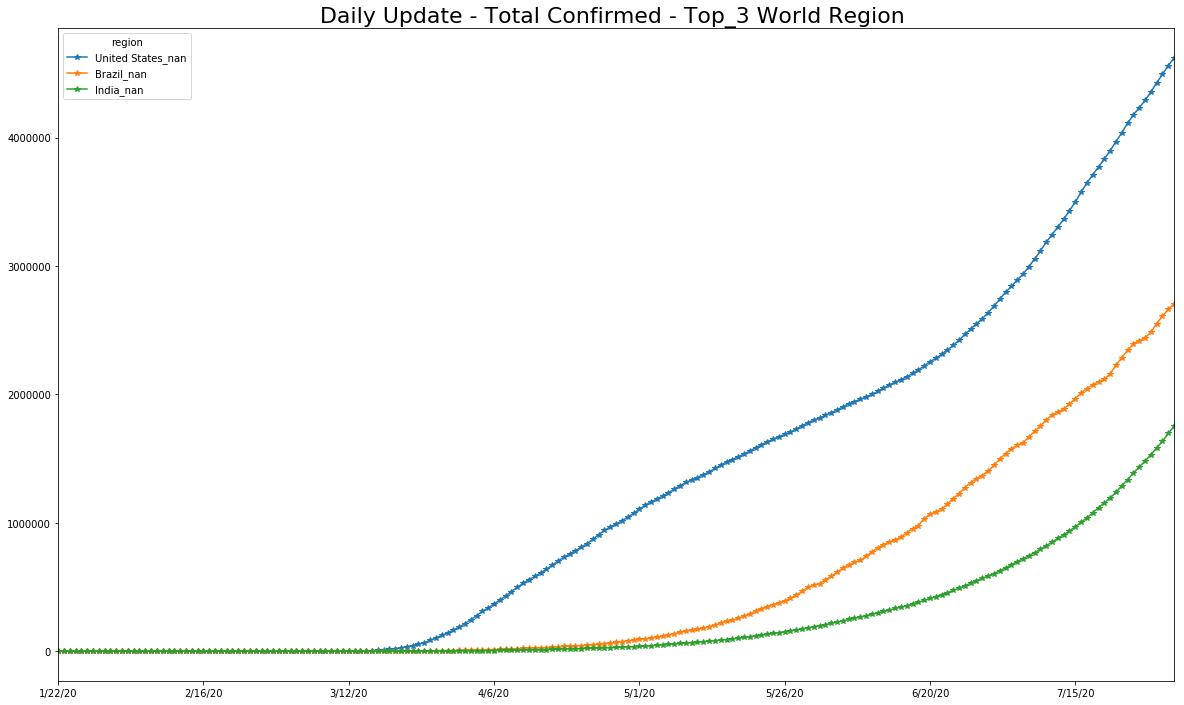

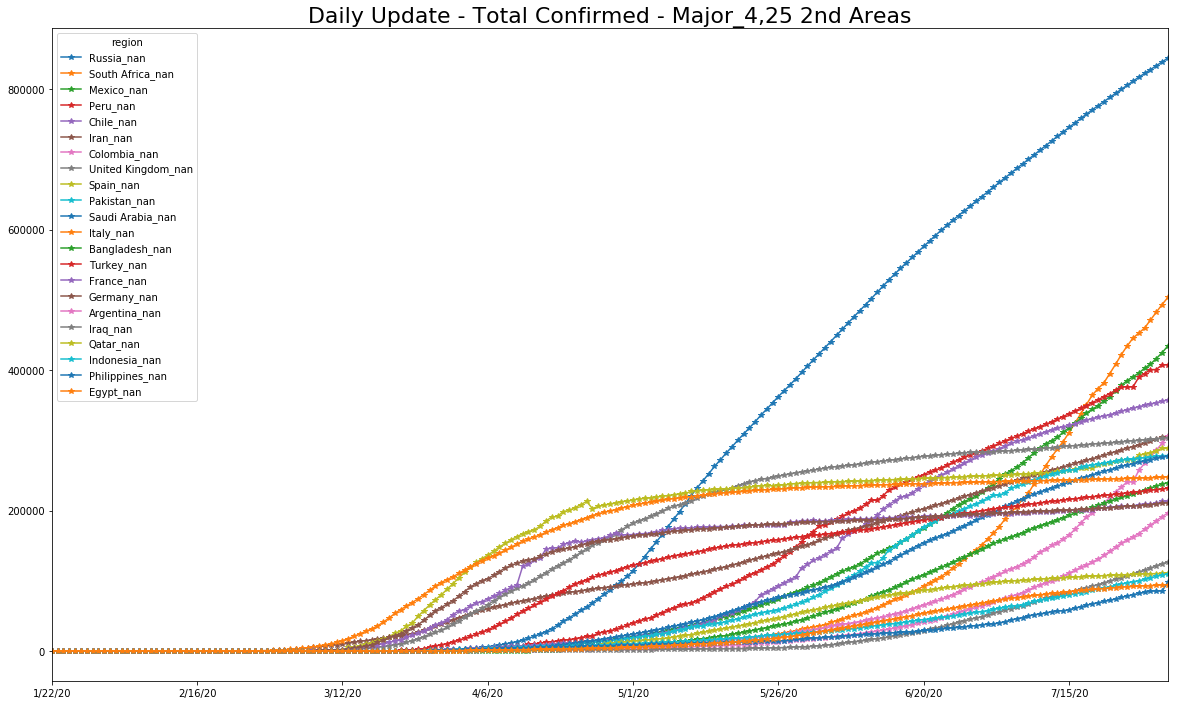

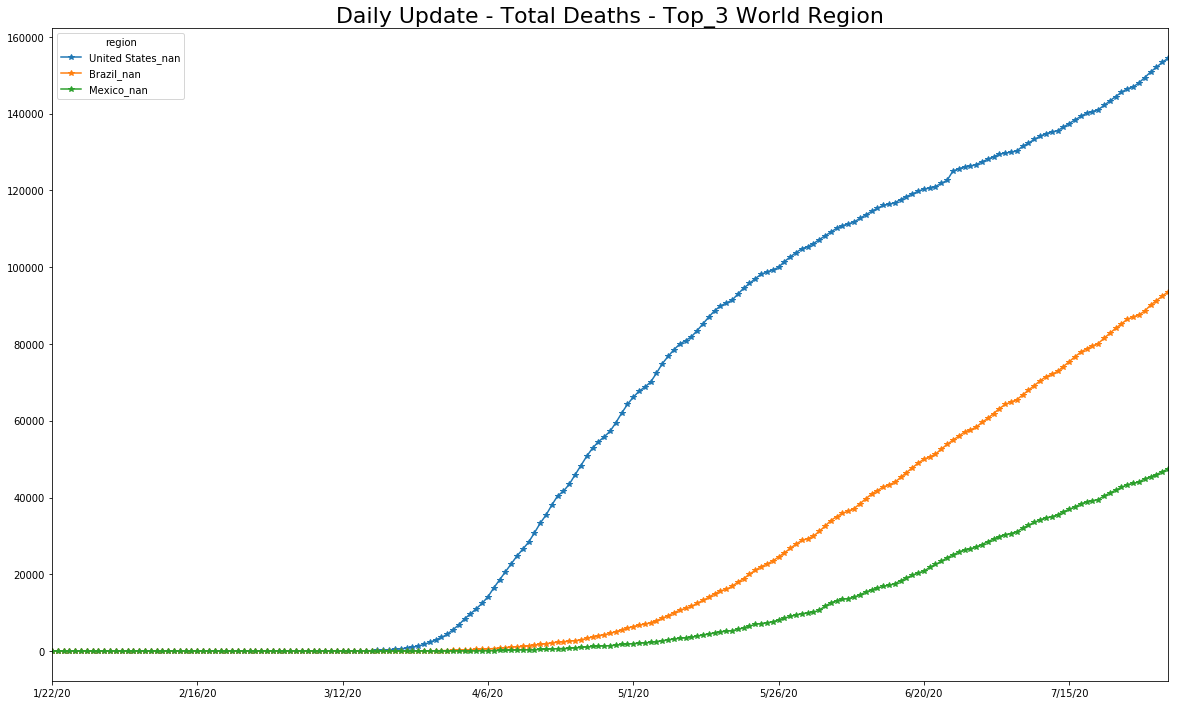

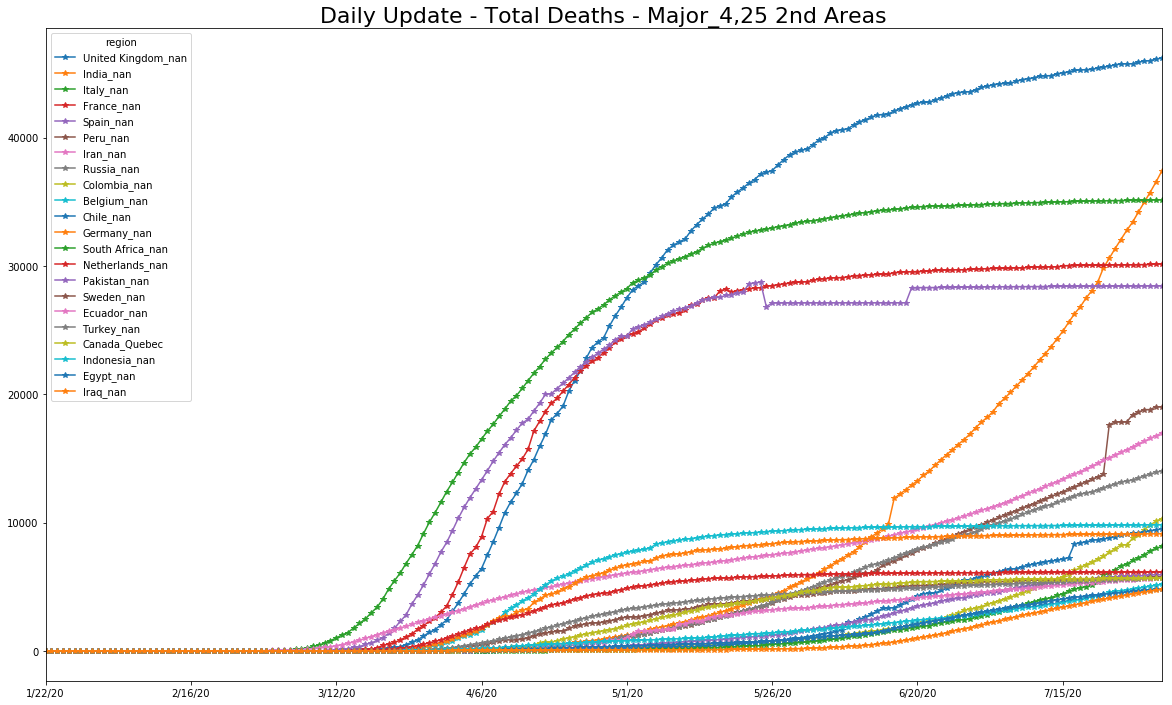

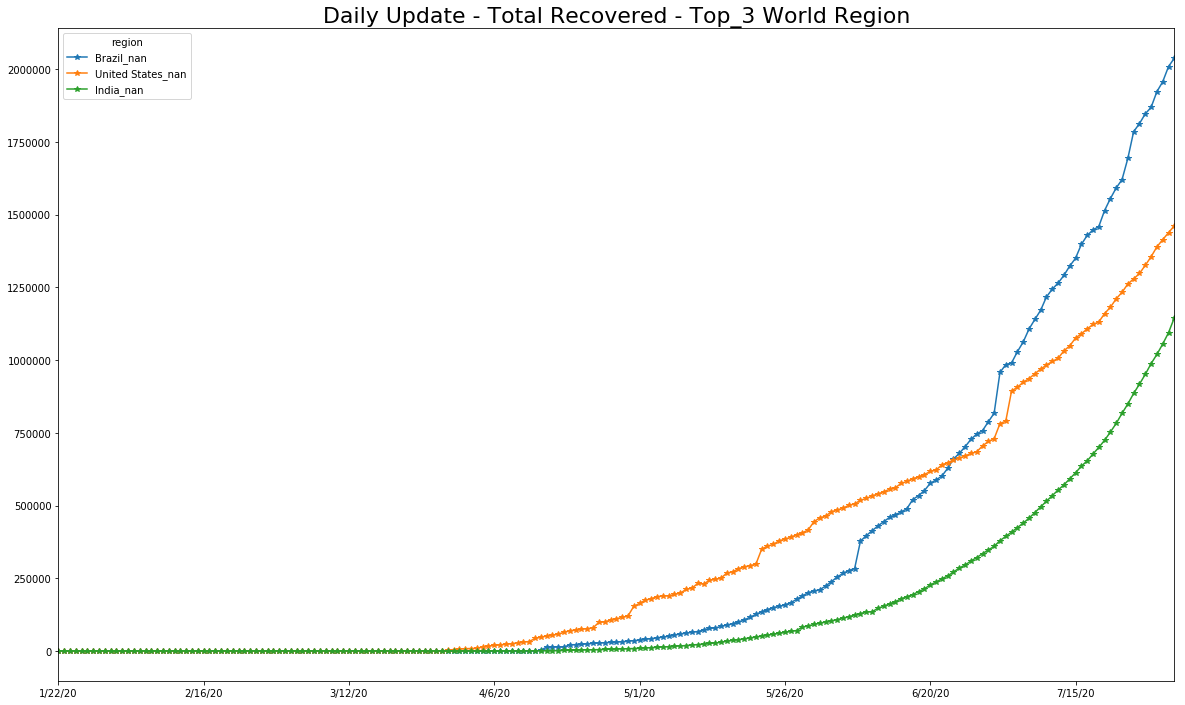

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/08/02


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[15:]
ts_d=ts_d[15:]
ts_rec=ts_rec[15:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/6/20                0            0            0            0           0   
2/7/20                0            0            0            0           0   
2/8/20                0            0            0            0           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/6/20                        0              0            0   
2/7/20                        0              0            0   
2/8/20                        0              0            0   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
2/6/20                                       0                          4   
2/7/20                                       0                          4   
2/8/20                                       0                          4   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/6/20  ...                 11            0               0              0   
2/7/20  ...                 11            0               0              0   
2/8/20  ...                 11            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/6/20           10                       0                   0          0   
2/7/20           10                       0                   0          0   
2/8/20           13                       0                   0          0   

region  Zambia_nan  Zimbabwe_nan  
2/6/20           0             0  
2/7/20           0             0  
2/8/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
7/29/20            36471         5105        29229          918        1078   
7/30/20            36542         5197        29831          922        1109   
7/31/20            36675         5276        30394          925        1148   
8/1/20             36710         5396        30950          925        1164   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
7/29/20                       91         178996        37937   
7/30/20                       91         185373        38196   
7/31/20                       91         191302        38550   
8/1/20                        91         196543        38841   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
7/29/20                                     113                       3736   
7/30/20                                     113                       3756   
7/31/20                                     113                       3773   
8/1/20                                      113                       3784   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
7/29/20  ...            4426982         1237           22585          17158   
7/30/20  ...            4495015         1243           23271          17859   
7/31/20  ...            4562038         1264           24009          18574   
8/1/20   ...            4620444         1278           24783          19443   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
7/29/20          459                   11284                  10       1711   
7/30/20          509                   11548                  10       1726   
7/31/20          558                   11837                  10       1728   
8/1/20           590                   12160                  10       1730   

region   Zambia_nan  Zimbabwe_nan  
7/29/20        5249          2879  
7/30/20        5555          3092  
7/31/20        5963          3169  
8/1/20         6228          3659  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
19    2020-02-25  Afghanistan_nan          1             1             1   
20    2020-02-26  Afghanistan_nan          1             0             1   
21    2020-02-27  Afghanistan_nan          1             0             1   
22    2020-02-28  Afghanistan_nan          1             0             0   
23    2020-02-29  Afghanistan_nan          1             0             0   
24    2020-03-01  Afghanistan_nan          1             0             0   
25    2020-03-02  Afghanistan_nan          1             0             0   
26    2020-03-03  Afghanistan_nan          1             0             0   
27    2020-03-04  Afghanistan_nan          1             0             0   
28    2020-03-05  Afghanistan_nan          1             0             0   
29    2020-03-06  Afghanistan_nan          1             0             0   
30    2020-03-07  Afghanistan_nan          1             0             0   
31    2020-03-08  Afghanistan_nan          4             0             0   
32    2020-03-09  Afghanistan_nan          4             3             3   
33    2020-03-10  Afghanistan_nan          5             0             3   
34    2020-03-11  Afghanistan_nan          7             1             4   
35    2020-03-12  Afghanistan_nan          7             2             3   
36    2020-03-13  Afghanistan_nan          7             0             3   
37    2020-03-14  Afghanistan_nan         11             0             2   
38    2020-03-15  Afghanistan_nan         16             4             4   
39    2020-03-16  Afghanistan_nan         21             5             9   
40    2020-03-17  Afghanistan_nan         22             5            14   
41    2020-03-18  Afghanistan_nan         22             1            11   
42    2020-03-19  Afghanistan_nan         22             0             6   
43    2020-03-20  Afghanistan_nan         24             0             1   
44    2020-03-21  Afghanistan_nan         24             2             2   
45    2020-03-22  Afghanistan_nan         40             0             2   
46    2020-03-23  Afghanistan_nan         40            16            18   
47    2020-03-24  Afghanistan_nan         74             0            16   
48    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
47942 2020-07-04     Zimbabwe_nan        698             8            34   
47943 2020-07-05     Zimbabwe_nan        716            73            93   
47944 2020-07-06     Zimbabwe_nan        734            18            99   
47945 2020-07-07     Zimbabwe_nan        787            18           109   
47946 2020-07-08     Zimbabwe_nan        885            53            89   
47947 2020-07-09     Zimbabwe_nan        885            98           169   
47948 2020-07-10     Zimbabwe_nan        942             0           151   
47949 2020-07-11     Zimbabwe_nan        982            57           155   
47950 2020-07-12     Zimbabwe_nan        985            40            97   
47951 2020-07-13     Zimbabwe_nan       1034             3           100   
47952 2020-07-14     Zimbabwe_nan       1064            49            92   
47953 2020-07-15     Zimbabwe_nan       1089            30            82   
47954 2020-07-16     Zimbabwe_nan       1362            25           104   
47955 2020-07-17     Zimbabwe_nan       1420           273           328   
47956 2020-07-18     Zimbabwe_nan       1478            58           356   
47957 2020-07-19     Zimbabwe_nan       1611            58           389   
47958 2020-07-20     Zimbabwe_nan       1713           133           249   
47959 2020-07-21     Zimbabwe_nan       1820           102           293   
47960 2020-07-22     Zimbabwe_nan       2034           107           342   
47961 2020-07-23     Zimbabwe_nan       2124           214           423   
47962 2020-07-24     Zimbabwe_nan       2296            90  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
47971 2020-08-02  Zimbabwe_nan          0           490           780   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
47971          1225         115.462607         127.093088         150.329088   

       last_day  kalman_prediction  population  infected_rate  min  max  
47971      3659             3655.0    14862924       0.000002  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000
ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
47969  2020-07-31  Zimbabwe_nan       3169           213           388   
47970  2020-08-01  Zimbabwe_nan       3659            77           352   
47971  2020-08-02  Zimbabwe_nan          0           490           780   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
47969           968         107.398750         114.349482         145.574859   
47970           873         102.490621         112.495918         138.023084   
47971          1225         115.462607         127.093088         150.329088   

       confirmed_yesterday  confirmed_prediction  population  infected_rate  \
47969                 3092                3202.0    14862924       0.000002   
47970                 3169                3314.0    14862924       0.000002   
47971                 3659                3655.0    14862924       0.000002   

       min  max  population_percentage : infected_rate confirmed  \
47969  NaN  NaN                                         0.000208   
47970  NaN  NaN                                         0.000213   
47971  NaN  NaN                                         0.000246   

       population_percentage : factor 9/10 infected_rate confirmed  \
47969                                           0.002081             
47970                                           0.002133             
47971                                           0.002463             

       delta : new_cases  delta : new_cases per 1M hab  
47969              110.0                      7.400966  
47970              145.0                      9.755819  
47971               -4.0                     -0.269126

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  1.234943e+11  351417.555103  31416.393258


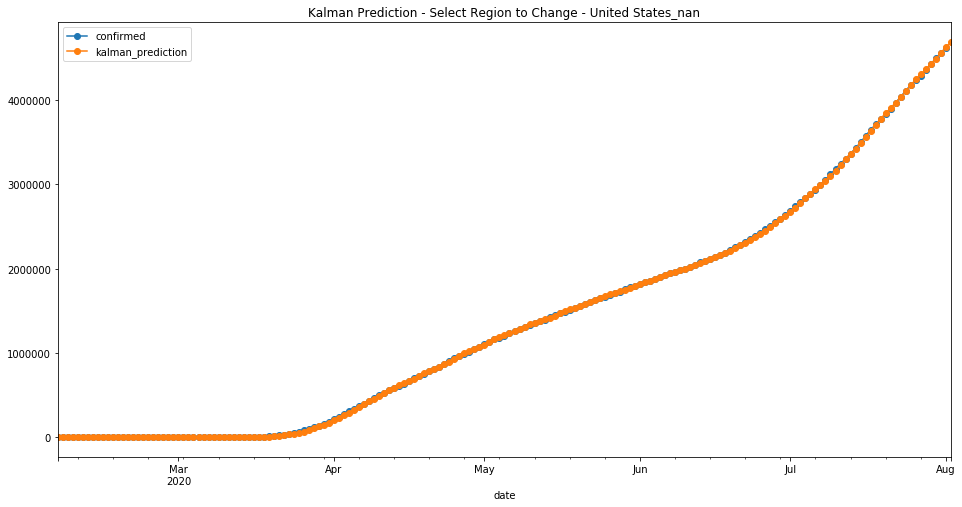

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse          mae
208  Russia_nan  4.055346e+09  63681.60113  5439.011236


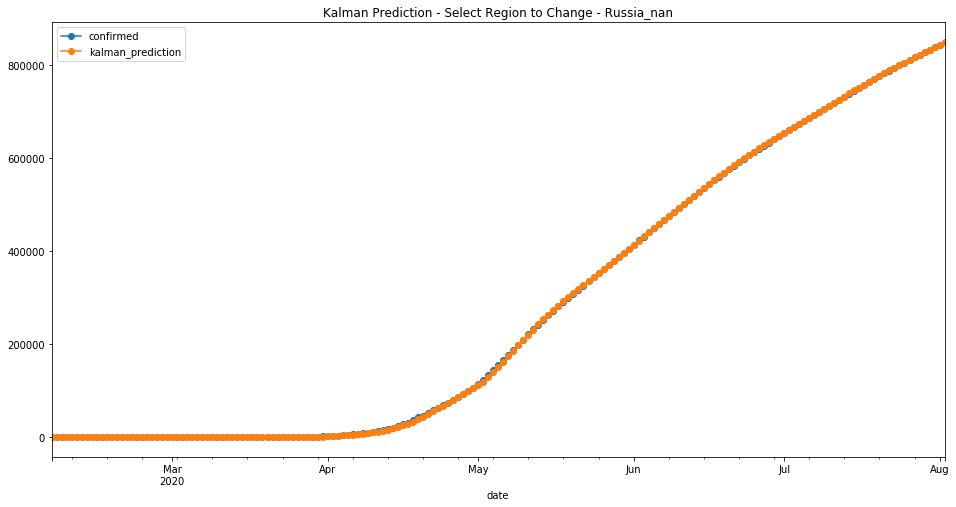

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  4.274926e+10  206758.949713  21031.780899


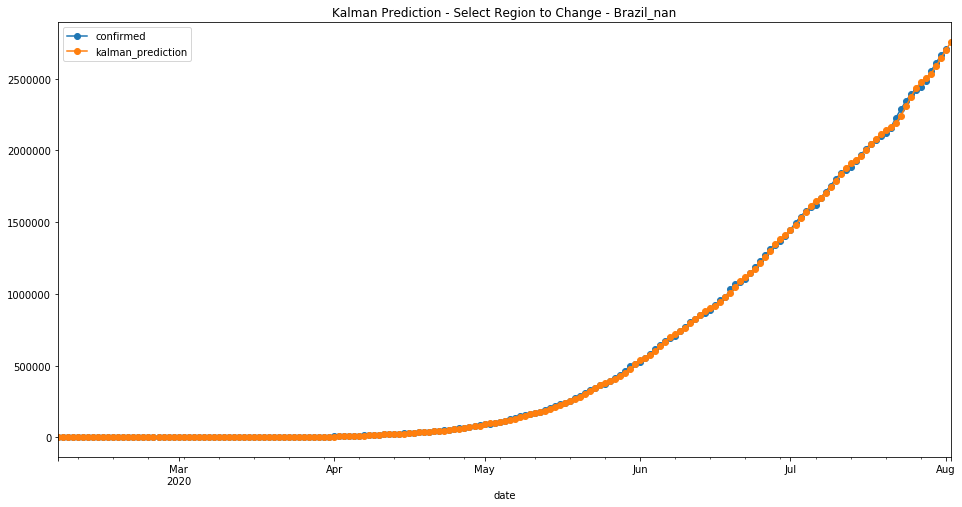

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  5.220670e+08  22848.786317  2236.988764


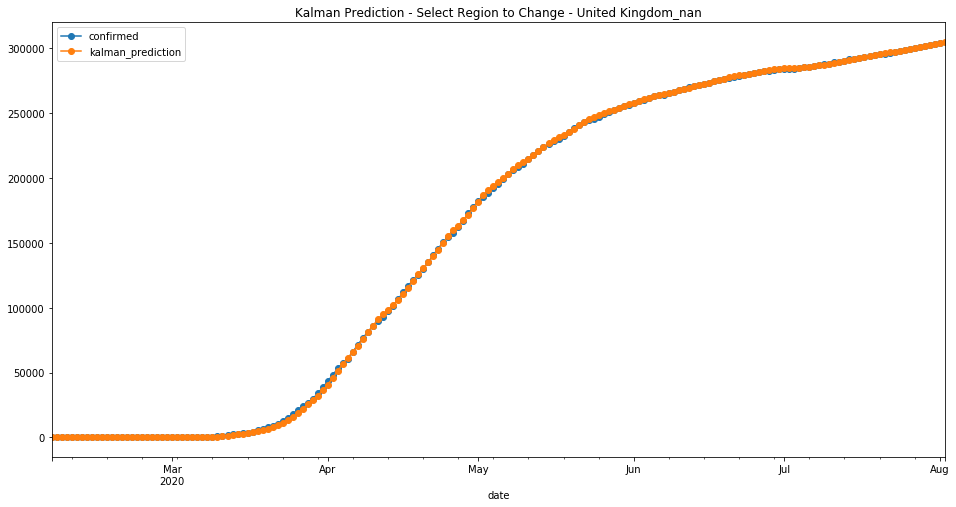

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxj0tgqyj
  JVM stdout: /tmp/tmpxj0tgqyj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxj0tgqyj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 9 months and 6 days !!!
H2O cluster name:           H2O_from_python_unknownUser_xt6mlq
H2O cluster total nodes:    1
H2O cluster free memory:    5 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-06-27
last_train_date= 2020-08-01
first_bootstrap_date= 2020-07-24
boost_bootstrap_date= 2020-07-29
first_test_date= 2020-07-23
last_test_date= 2020-08-02
first_valid_date= 2020-07-31


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   36079.0      35981 2020-07-24  Afghanistan_nan
1   36034.0      36036 2020-07-25  Afghanistan_nan
2   36099.0      36157 2020-07-26  Afghanistan_nan
3   36268.0      36263 2020-07-27  Afghanistan_nan
4   36365.0      36368 2020-07-28  Afghanistan_nan
5   36460.0      36471 2020-07-29  Afghanistan_nan
6   36565.0      36542 2020-07-30  Afghanistan_nan
7   36600.0      36675 2020-07-31  Afghanistan_nan
8   36778.0      36710 2020-08-01  Afghanistan_nan
9   36768.0          0 2020-08-02  Afghanistan_nan
10   4561.0       4570 2020-07-24      Albania_nan
11   4676.0       4637 2020-07-25      Albania_nan
12   4714.0       4763 2020-07-26      Albania_nan
13   4878.0       4880 2020-07-27      Albania_nan
14   4994.0       4997 2020-07-28      Albania_nan
15   5098.0       5105 2020-07-29      Albania_nan
16   5212.0       5197 2020-07-30      Albania_nan
17   5296.0       5276 2020-07-31      Albania_nan
18   5371.0       5396 2020-08-01      Albania_nan
19   5522.0          0 2020-08-02      Albania_nan
20  26134.0      26159 2020-07-24      Algeria_nan
21  26840.0      26764 2020-07-25      Algeria_nan
22  27401.0      27357 2020-07-26      Algeria_nan
23  28000.0      27973 2020-07-27      Algeria_nan
24  28644.0      28615 2020-07-28      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  31235.0      31221 2020-07-29  Azerbaijan_nan
176  31576.0      31560 2020-07-30  Azerbaijan_nan
177  31911.0      31878 2020-07-31  Azerbaijan_nan
178  32235.0      32157 2020-08-01  Azerbaijan_nan
179  32503.0          0 2020-08-02  Azerbaijan_nan
180    316.0        316 2020-07-24     Bahamas_nan
181    353.0        326 2020-07-25     Bahamas_nan
182    348.0        342 2020-07-26     Bahamas_nan
183    375.0        382 2020-07-27     Bahamas_nan
184    432.0        447 2020-07-28     Bahamas_nan
185    507.0        484 2020-07-29     Bahamas_nan
186    526.0        508 2020-07-30     Bahamas_nan
187    539.0        574 2020-07-31     Bahamas_nan
188    632.0        599 2020-08-01     Bahamas_nan
189    640.0          0 2020-08-02     Bahamas_nan
190  38346.0      38458 2020-07-24     Bahrain_nan
191  38864.0      38747 2020-07-25     Bahrain_nan
192  39016.0      39131 2020-07-26     Bahrain_nan
193  39442.0      39482 2020-07-27     Bahrain_nan
194  39770.0      39921 2020-07-28     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  66785.0      66846 2020-07-24  Belarus_nan
221  66932.0      67002 2020-07-25  Belarus_nan
222  67087.0      67132 2020-07-26  Belarus_nan
223  67208.0      67251 2020-07-27  Belarus_nan
224  67330.0      67366 2020-07-28  Belarus_nan
225  67448.0      67518 2020-07-29  Belarus_nan
226  67613.0      67665 2020-07-30  Belarus_nan
227  67748.0      67808 2020-07-31  Belarus_nan
228  67879.0      67946 2020-08-01  Belarus_nan
229  68014.0          0 2020-08-02  Belarus_nan
230  65031.0      65199 2020-07-24  Belgium_nan
231  65429.0      65727 2020-07-25  Belgium_nan
232  66082.0      66026 2020-07-26  Belgium_nan
233  66283.0      66428 2020-07-27  Belgium_nan
234  66729.0      66662 2020-07-28  Belgium_nan
235  66945.0      67335 2020-07-29  Belgium_nan
236  67840.0      68006 2020-07-30  Belgium_nan
237  68533.0      68751 2020-07-31  Belgium_nan
238  69269.0      69402 2020-08-01  Belgium_nan
239  69886.0          0 2020-08-02  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  20507021.774931915
# MSE on the validation data =  296316987633.6819
# R^2 on the training data =  0.9998851699395104
# R^2 on the validation data =  0.4450566458278933


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1596365268220_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 20507021.774931915
RMSE: 4528.467928000806
MAE: 765.3451499162263
RMSLE: 0.28166558204139985
Mean Residual Deviance: 20507021.774931915

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 296316987633.6819
RMSE: 544350.0598270216
MAE: 128534.76514072526
RMSLE: 6.437955328302726
Mean Residual Deviance: 296316987633.6819
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-08-02 10:47:54  0.054 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-08-02 10:47:55  0.425 sec   1.0                9308.56353616636    2258.8274712506695  86649355.10684599    532835.2112739212   123076.92752102688  283913362373.3243
     2020-08-02 10:47:55  0.705 sec   2.0                13907.97270022746   2487.552293852021   193431704.6302723    533127.2017593939   123067.2341272165   284224613255.8015
     2020-08-02 10:47:55  1.011 sec   3.0                11462.513817810835  2211.379425075725   131389223.02350432   538728.091240436    124100.76770017245  290227956291.56354
     2020-08-02 10:47:56  1.243 sec   4.0                11912.945844649212  2236.2863834060595  141918278.69754493   522738.44549172913  124759.42618785893  273255482395.10944
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-08-02 10:48:03  8.112 sec   126.0              5617.235069692545   911.1395727103871   31553329.82818381    549735.7563371098   129459.91414014378  302209401795.53424
     2020-08-02 10:48:07  12.127 sec  220.0              4782.842770307041   786.6336439927227   22875584.965478335   547911.0307639429   129478.1458880499   300206497632.8064
     2020-08-02 10:48:11  16.136 sec  322.0              4600.424435340132   764.2756390260937   21163904.985274572   544983.3296715511   128753.20896950878  297006829619.89056
     2020-08-02 10:48:15  20.142 sec  421.0              4496.310811848575   762.5893691432221   20216810.916746397   544418.1598880338   128595.27223667395  296391132815.87274
     2020-08-02 10:48:18  23.483 sec  500.0              4528.467928000806   765.3451499162263   20507021.774931915   544350.0598270216   128534.76514072526  296316987633.6819


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           2.08749e+17            1                    0.371297
kalman_prediction  1.58533e+17            0.759445             0.28198
7_day_change       8.44925e+16            0.404757             0.150285
3_day_change       5.53243e+16            0.265028             0.0984041
1_day_change       2.89458e+16            0.138663             0.0514853
infected_rate      1.20394e+16            0.0576742            0.0214143
region             1.00793e+16            0.0482845            0.0179279
max                1.18645e+15            0.00568365           0.00211032
7_day_change_rate  1.03431e+15            0.00495482           0.00183971
3_day_change_rate  8.13473e+14            0.0038969            0.00144691
1_day_change_rate  7.91337e+14            0.00379086           0.00140754
min                2.25981e+14            0.00108255           0.000401947

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         2.087487e+17           1.000000    0.371297
1   kalman_prediction         1.585331e+17           0.759445    0.281980
2        7_day_change         8.449248e+16           0.404757    0.150285
3        3_day_change         5.532425e+16           0.265028    0.098404
4        1_day_change         2.894579e+16           0.138663    0.051485
5       infected_rate         1.203941e+16           0.057674    0.021414
6              region         1.007933e+16           0.048285    0.017928
7                 max         1.186454e+15           0.005684    0.002110
8   7_day_change_rate         1.034312e+15           0.004955    0.001840
9   3_day_change_rate         8.134732e+14           0.003897    0.001447
10  1_day_change_rate         7.913371e+14           0.003791    0.001408
11                min         2.259806e+14           0.001083    0.000402

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


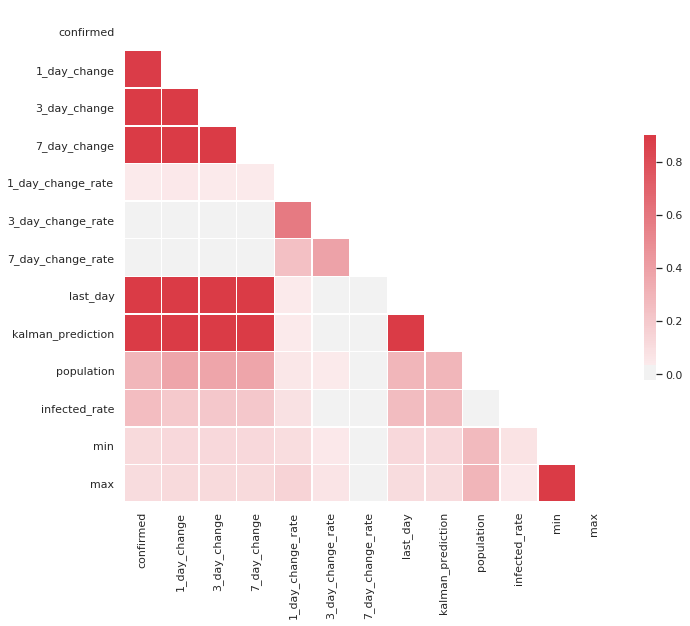

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.892570
3_day_change         0.901373
7_day_change         0.912578
1_day_change_rate    0.038041
3_day_change_rate    0.009056
7_day_change_rate   -0.008821
last_day             0.981836
kalman_prediction    0.981877
population           0.291661
infected_rate        0.257985
min                  0.119197
max                  0.108327
Name: confirmed, dtype: float64


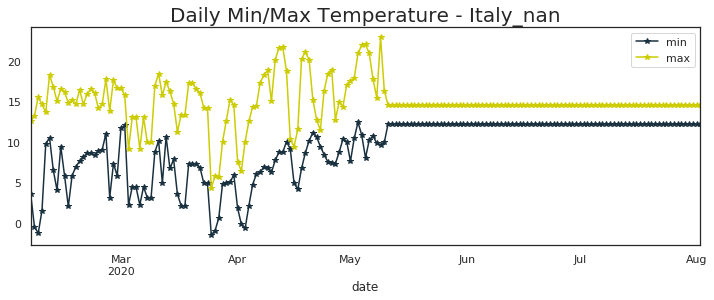

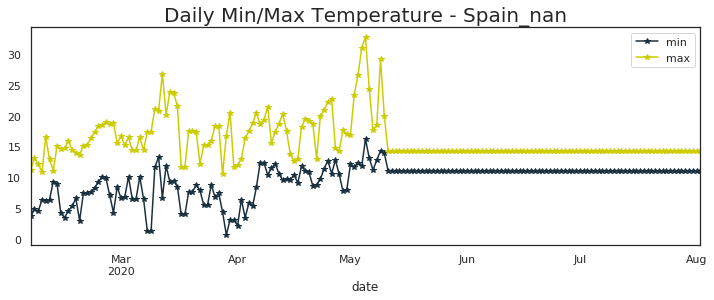

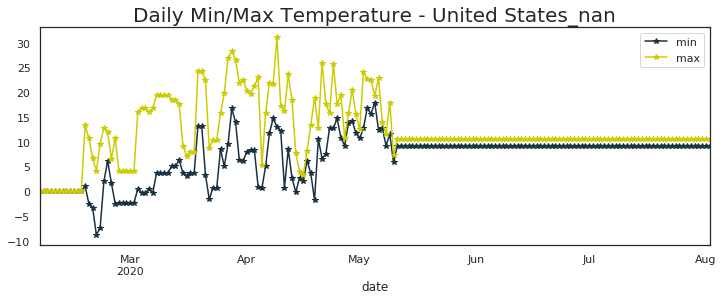

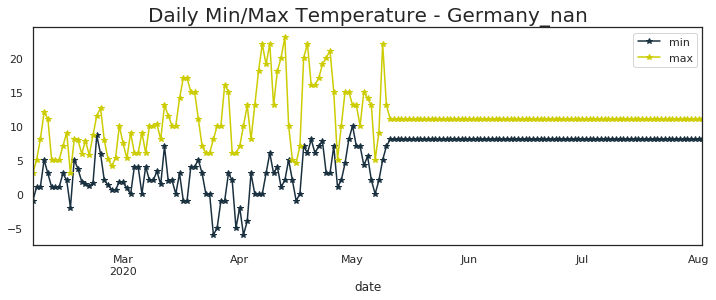

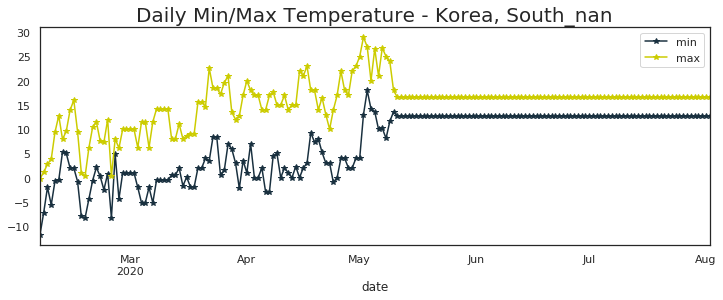

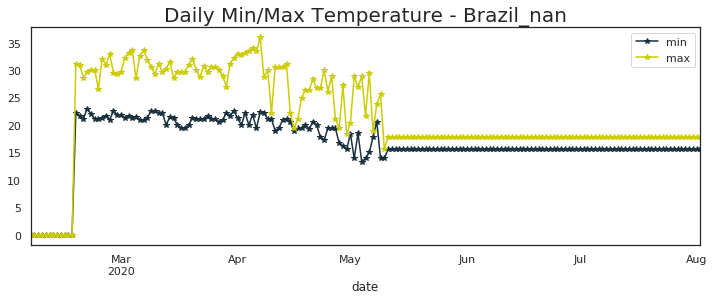

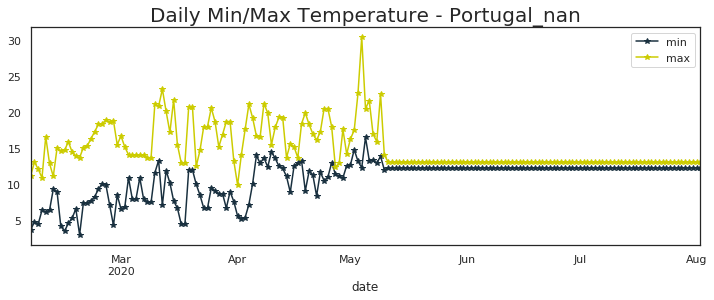

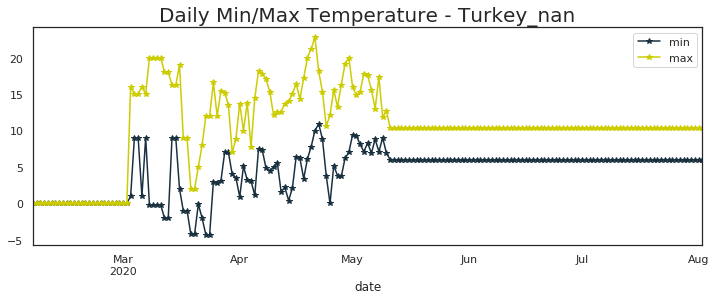

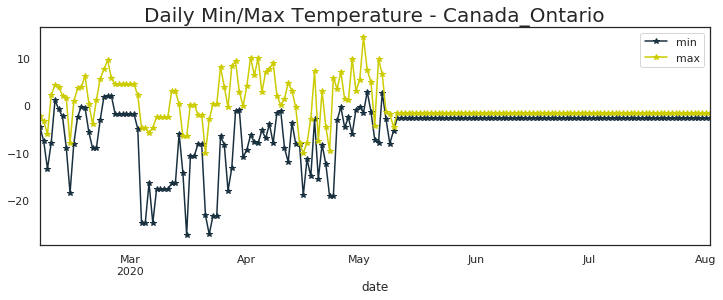

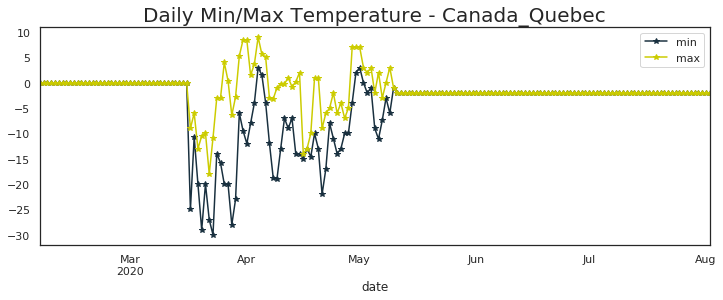

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Brazil_nan                  23.0  36.0
India_nan                   30.0  43.0
Russia_nan                  13.0  30.0
South Africa_nan             0.0   0.0
Mexico_nan                   0.0   0.0
Peru_nan                     0.0   0.0
Chile_nan                    0.0   0.0
Iran_nan                    17.8  29.3
Colombia_nan                 0.0   0.0
United Kingdom_nan          10.0  18.3
Spain_nan                   16.2  32.7
Pakistan_nan                16.0  28.0
Saudi Arabia_nan             0.0   0.0
Italy_nan                   12.4  22.9
Bangladesh_nan               0.0   0.0
Turkey_nan                  10.9  22.8
France_nan                  14.2  23.8
Germany_nan                 10.0  23.0
Argentina_nan                0.0   0.0
Iraq_nan                    21.2  29.1
Qatar_nan                    0.0   0.0
Indonesia_nan               

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

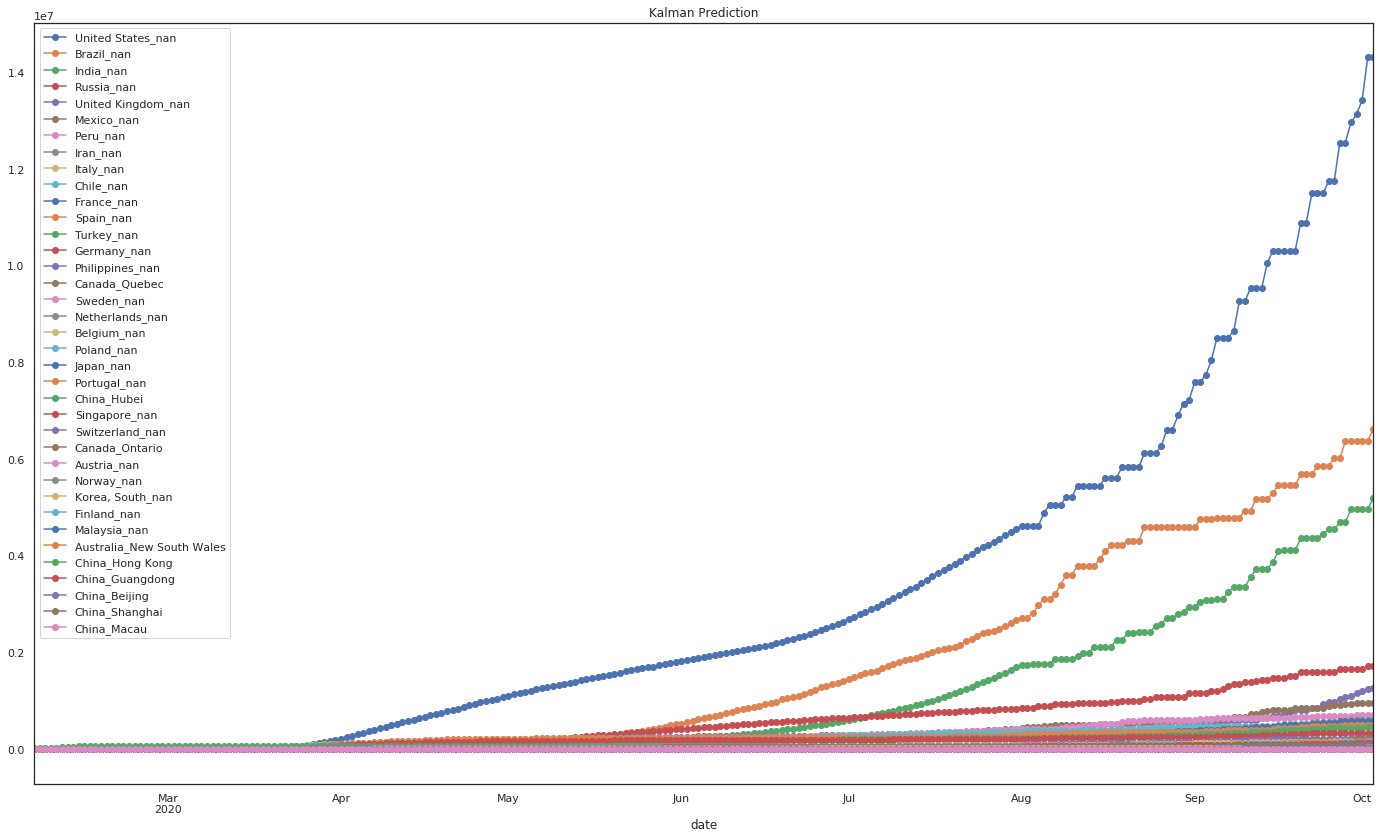

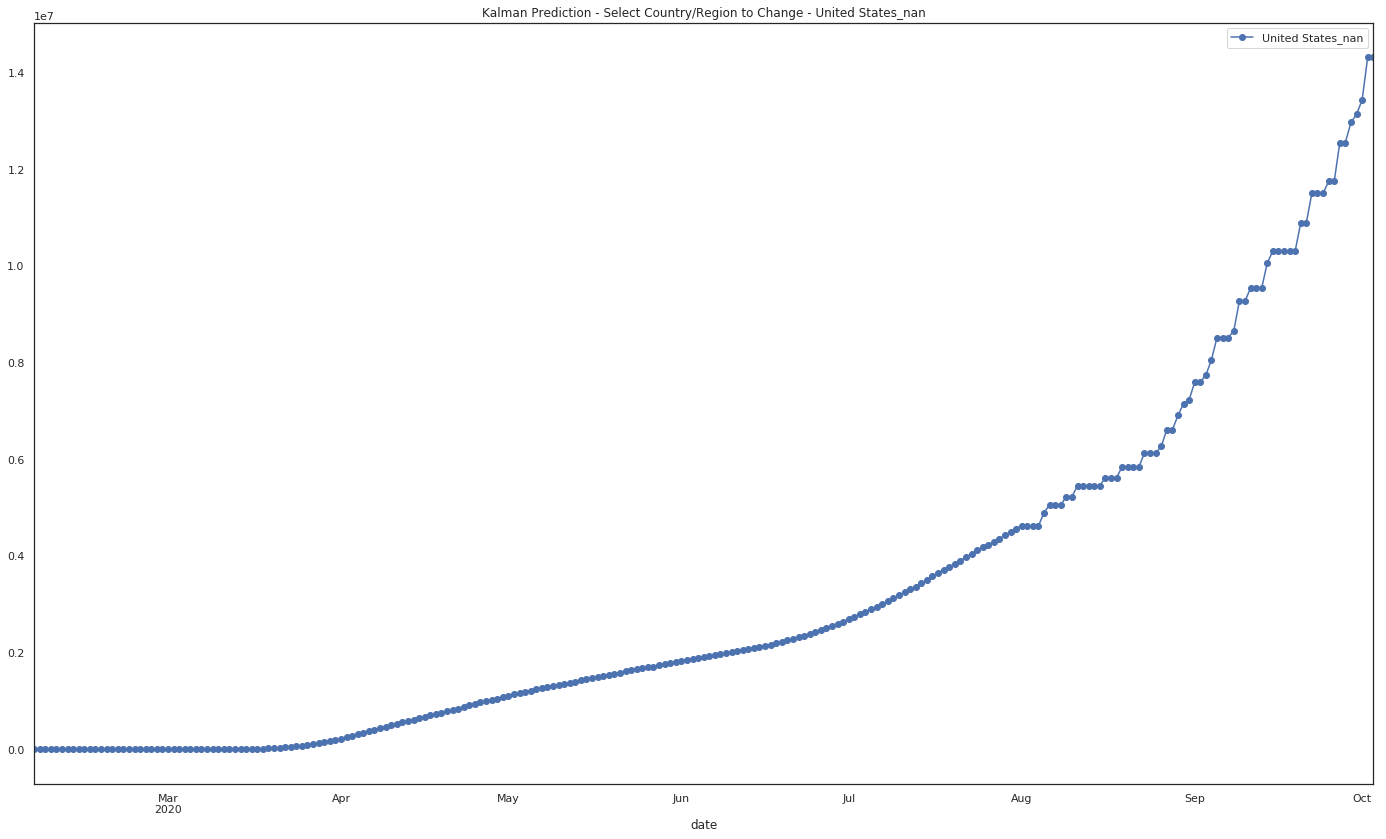

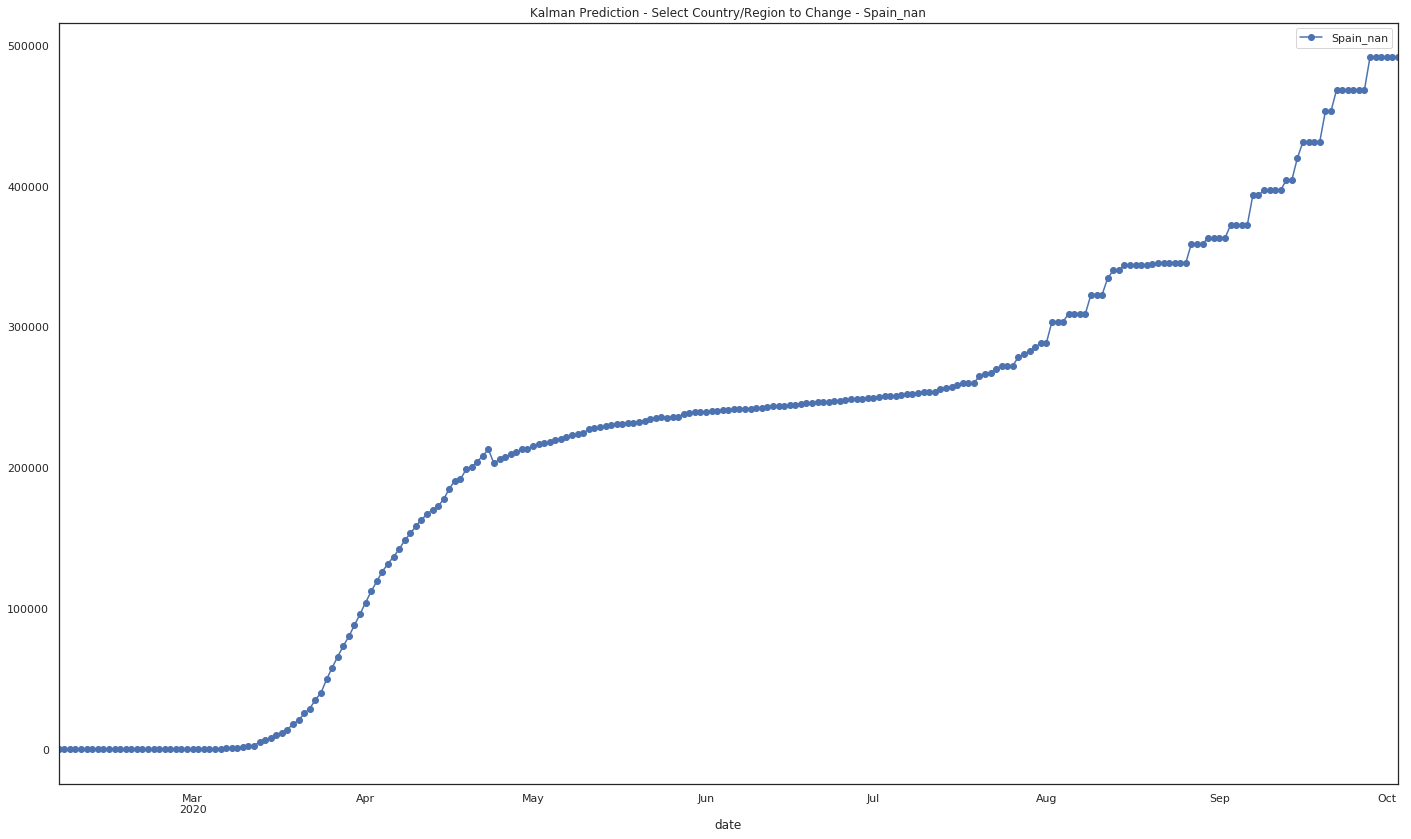

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


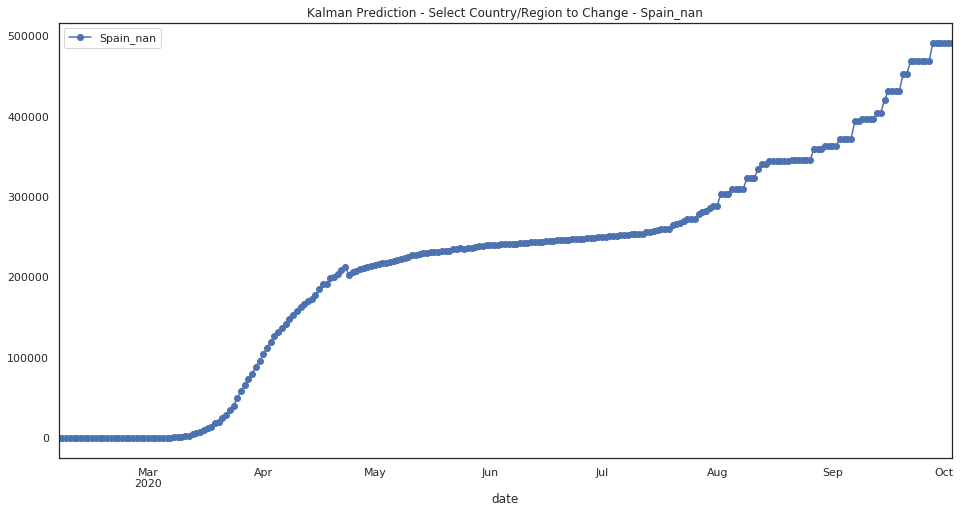

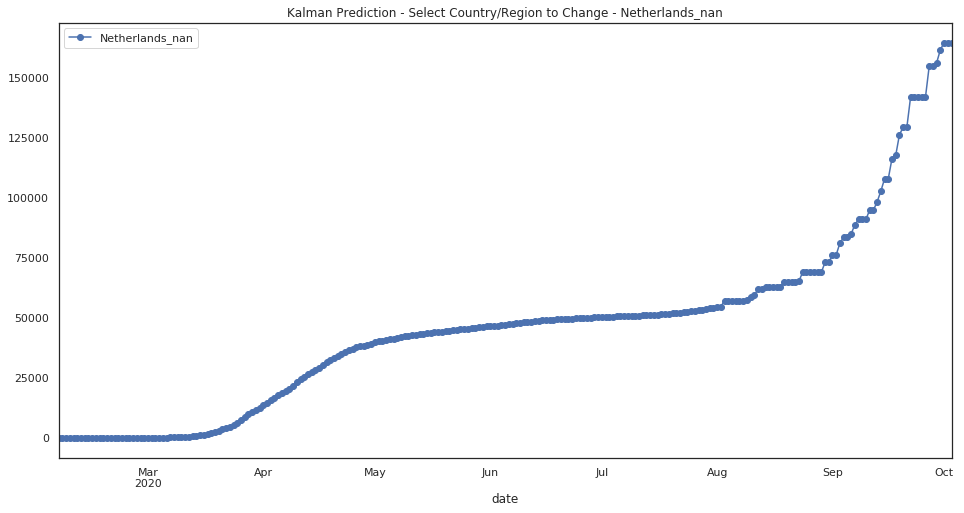

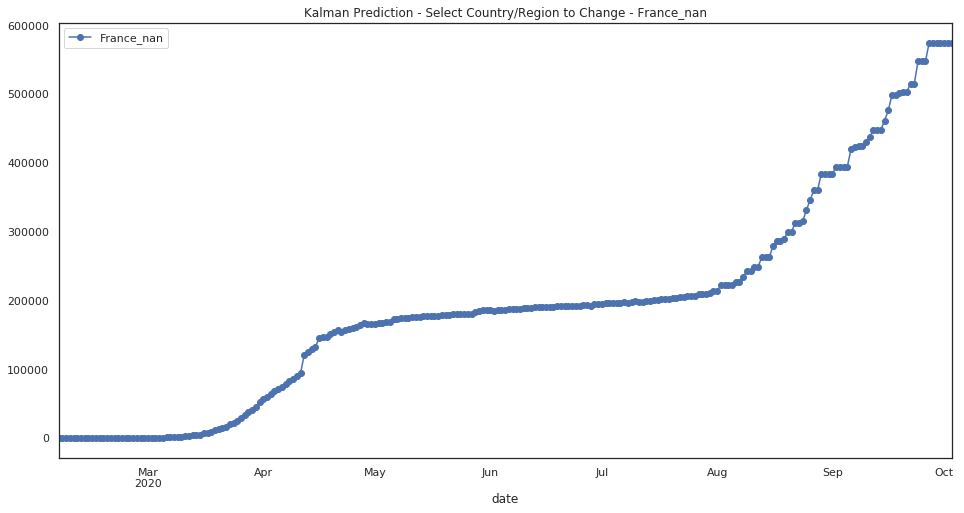

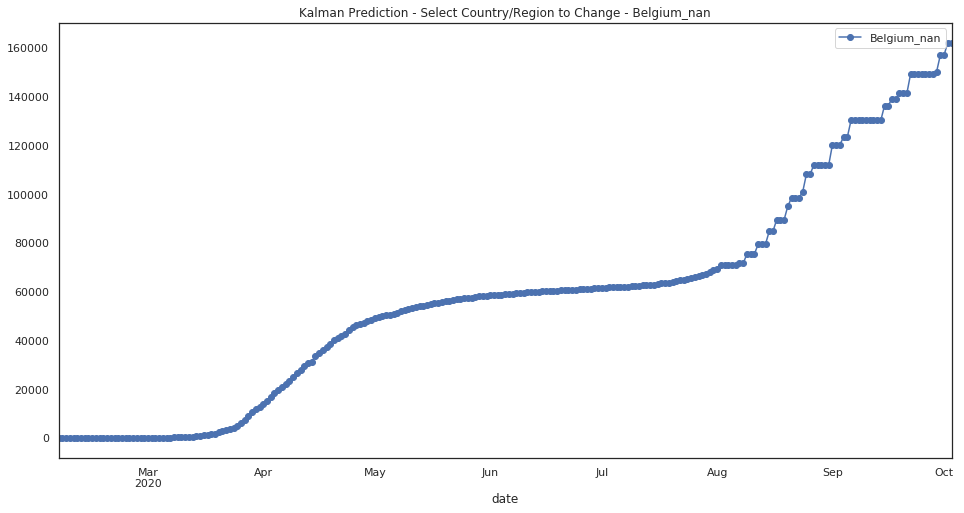

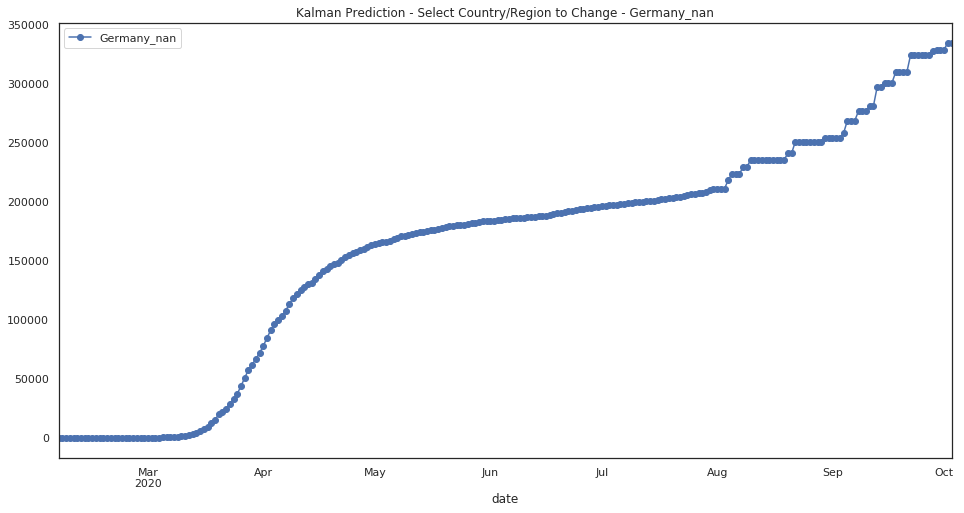

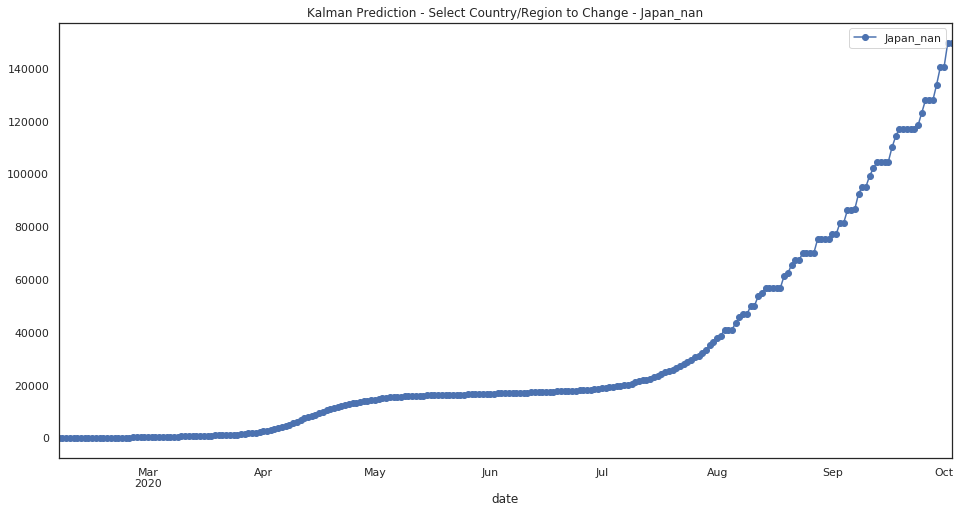

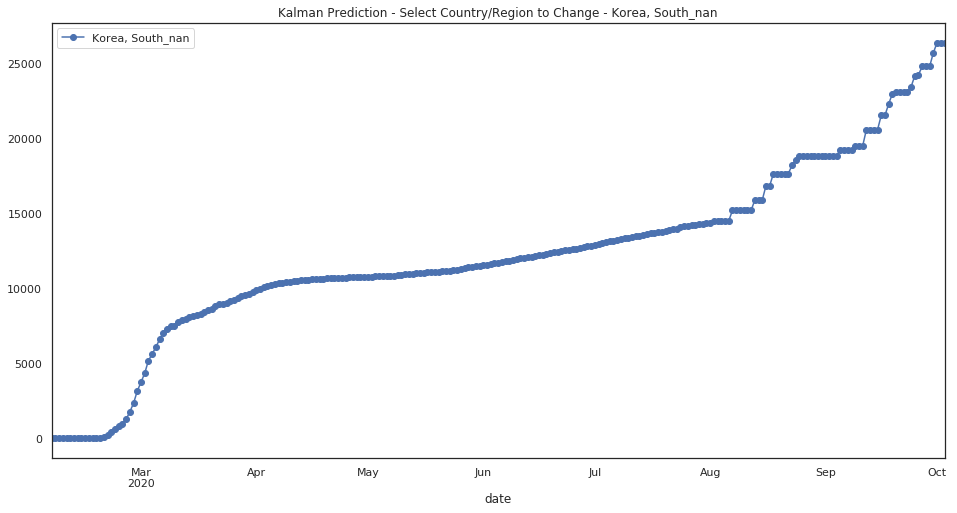

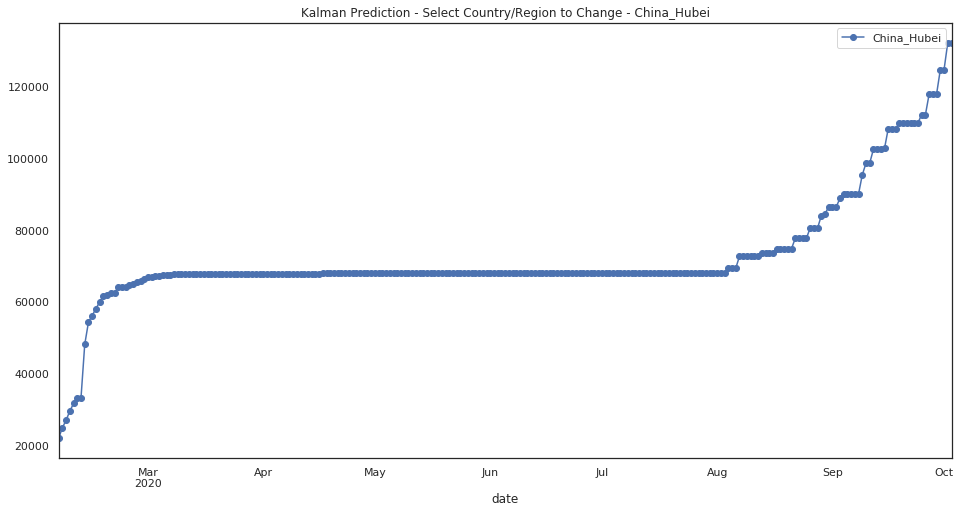

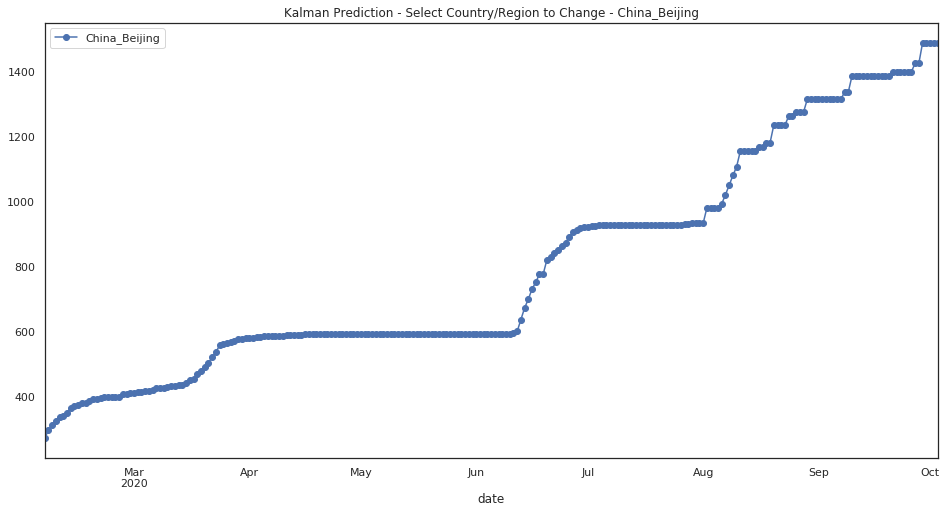

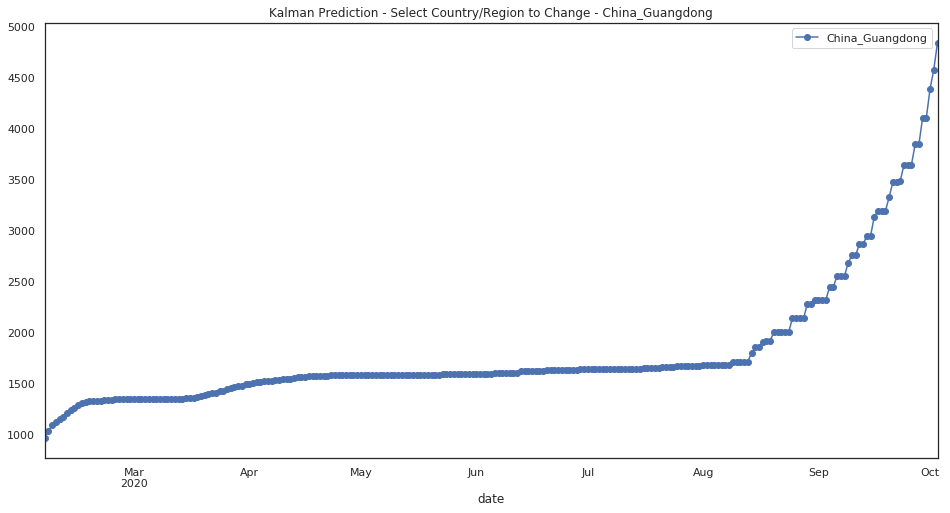

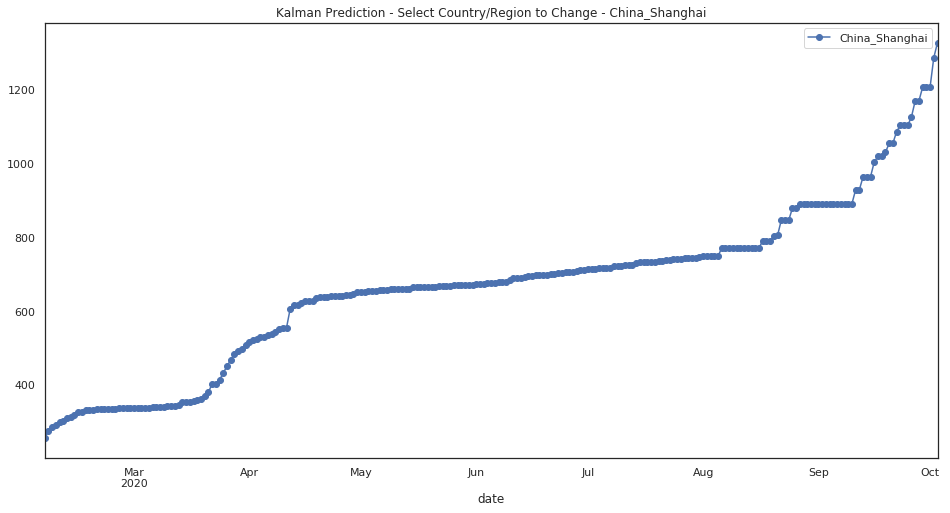

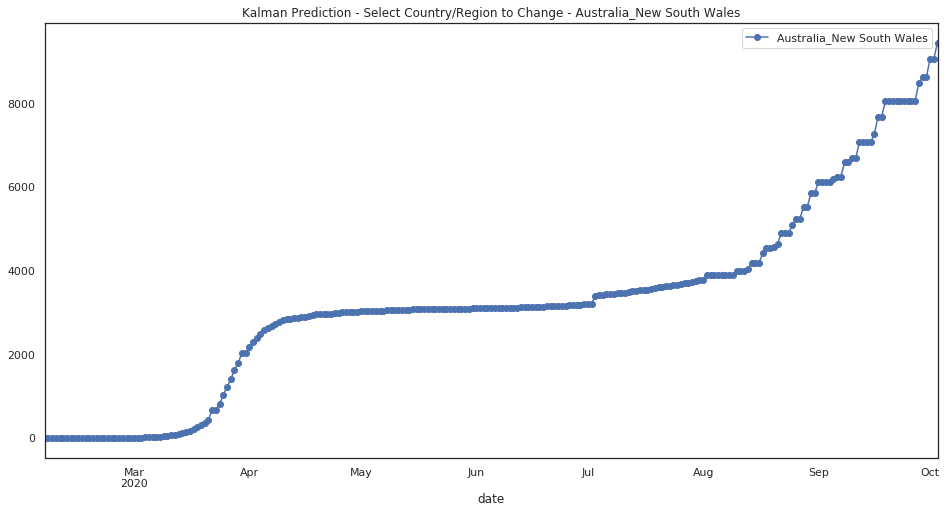

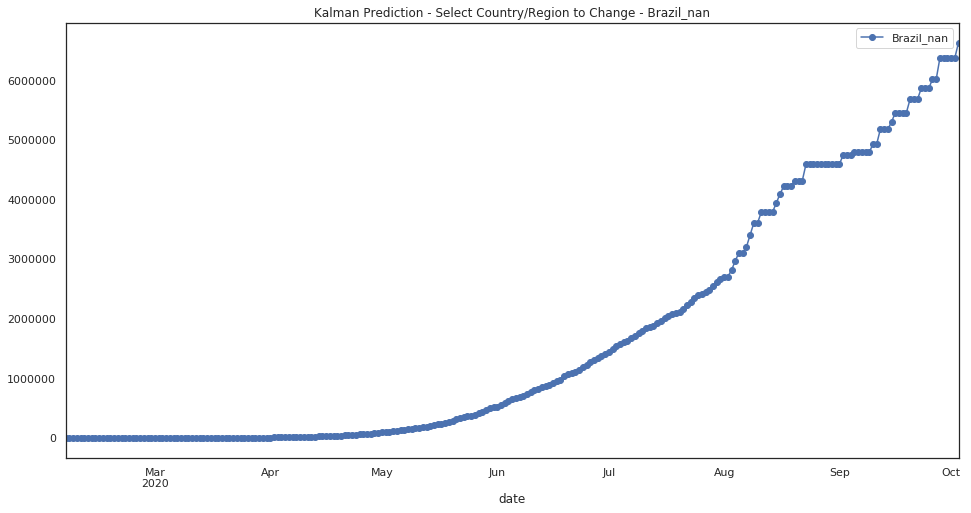

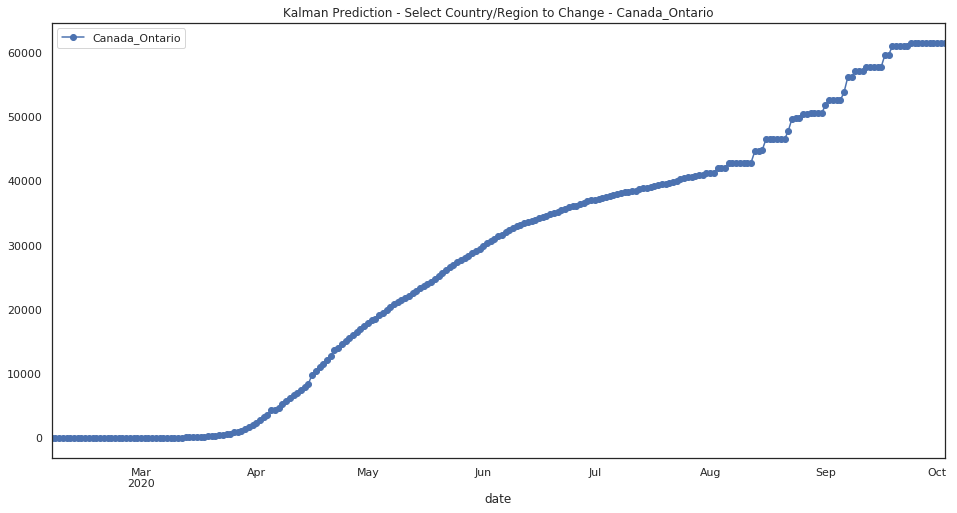

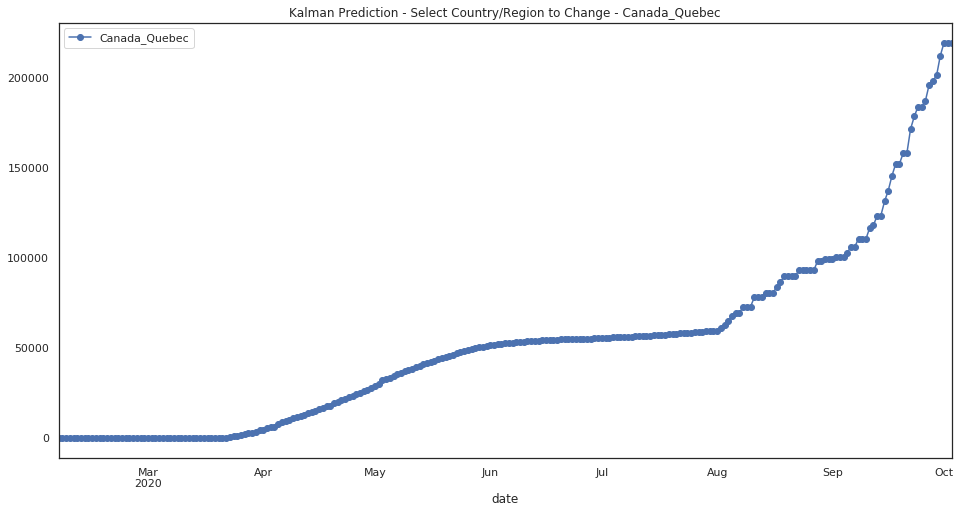

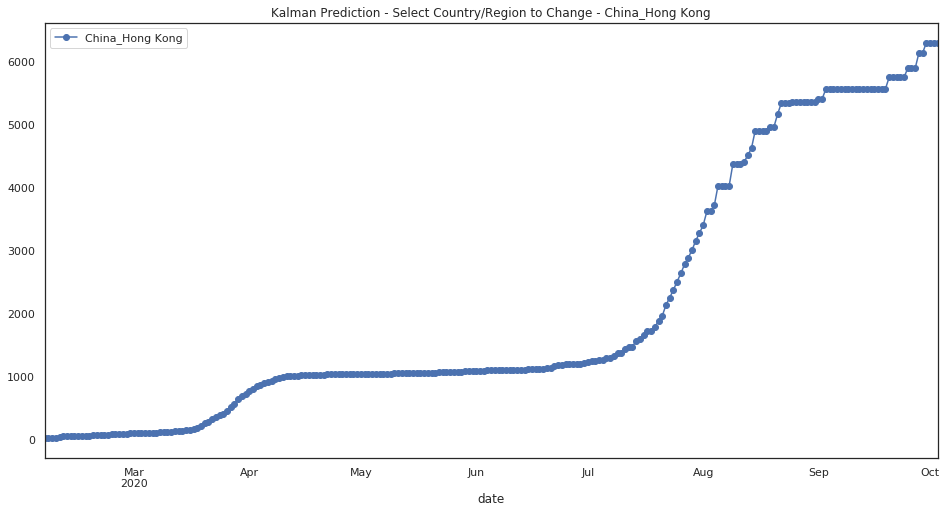

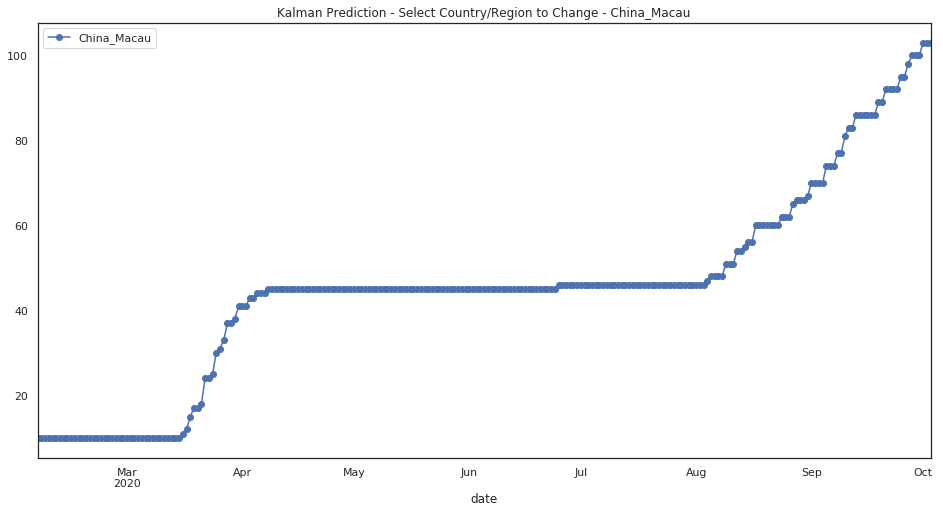

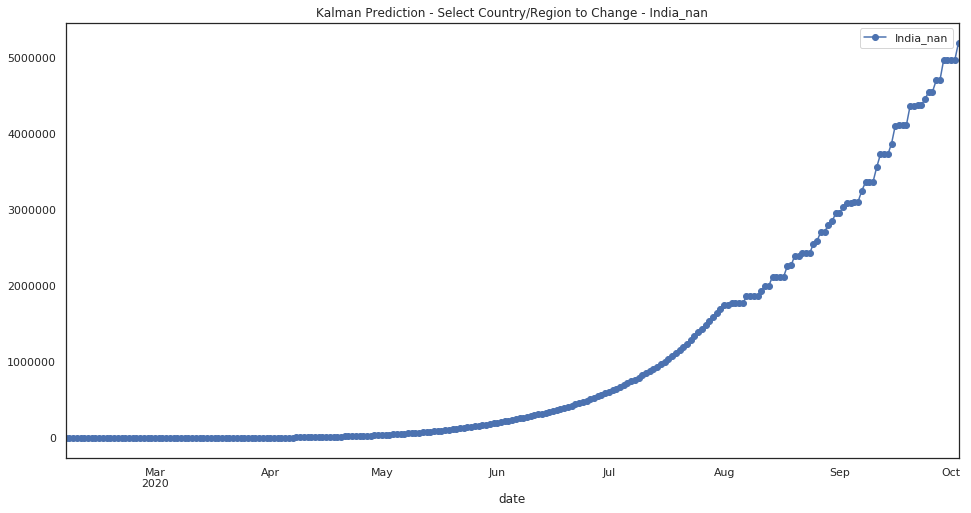

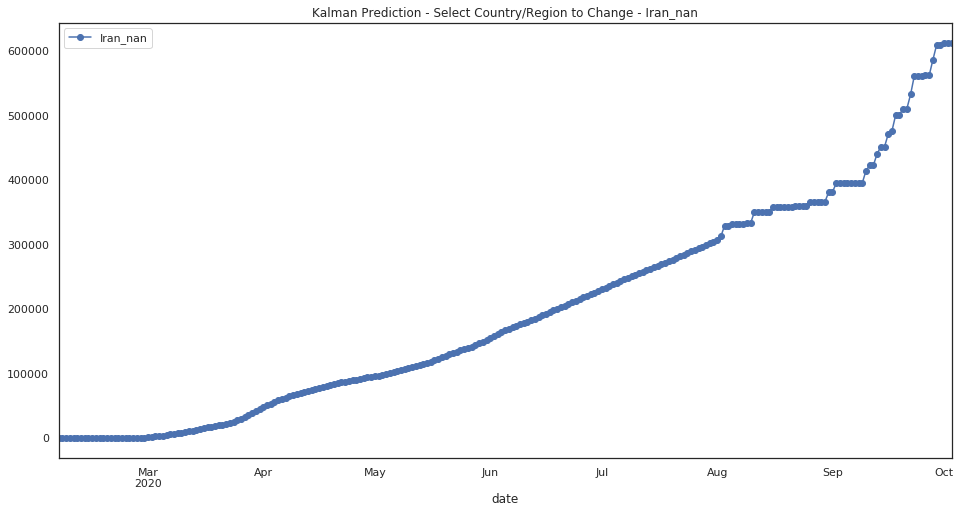

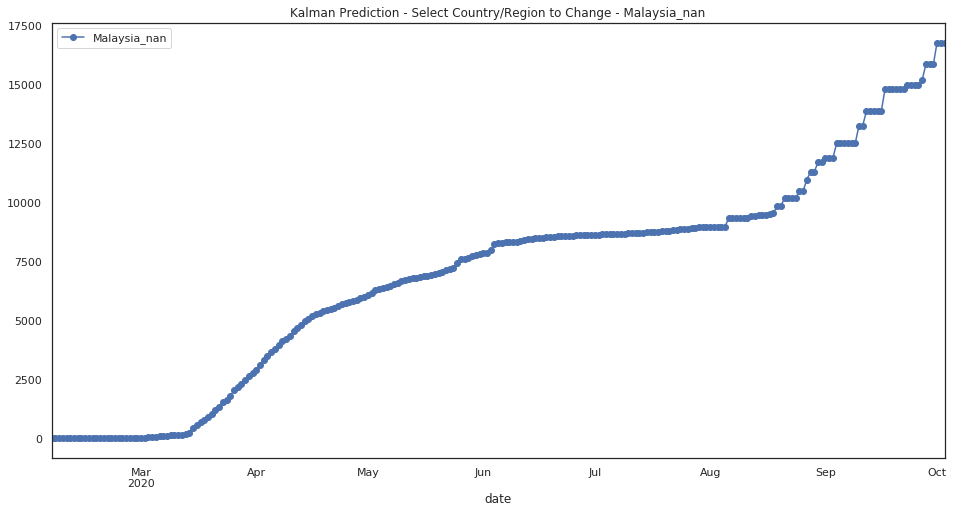

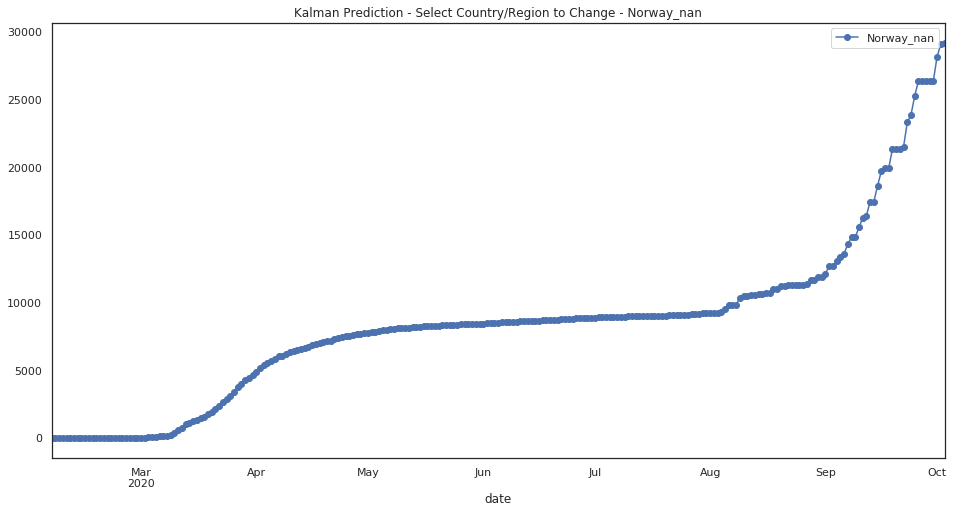

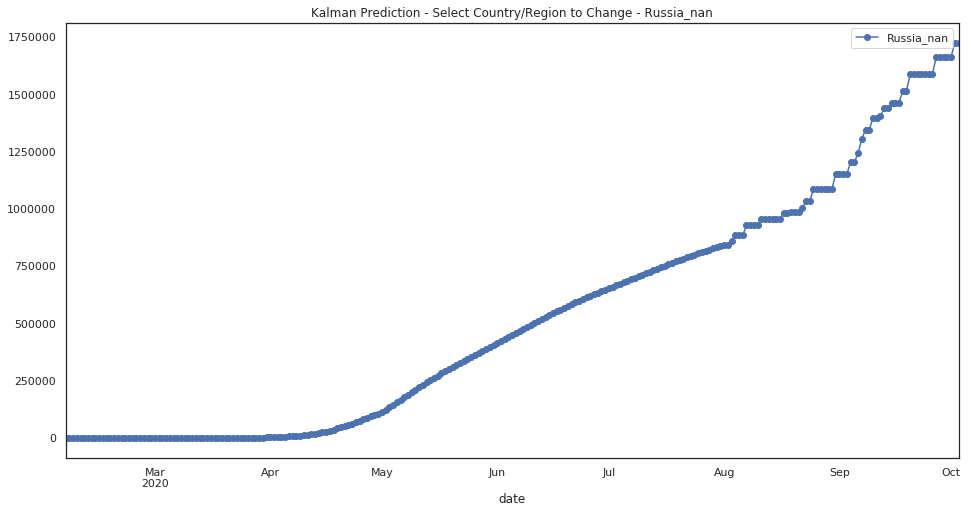

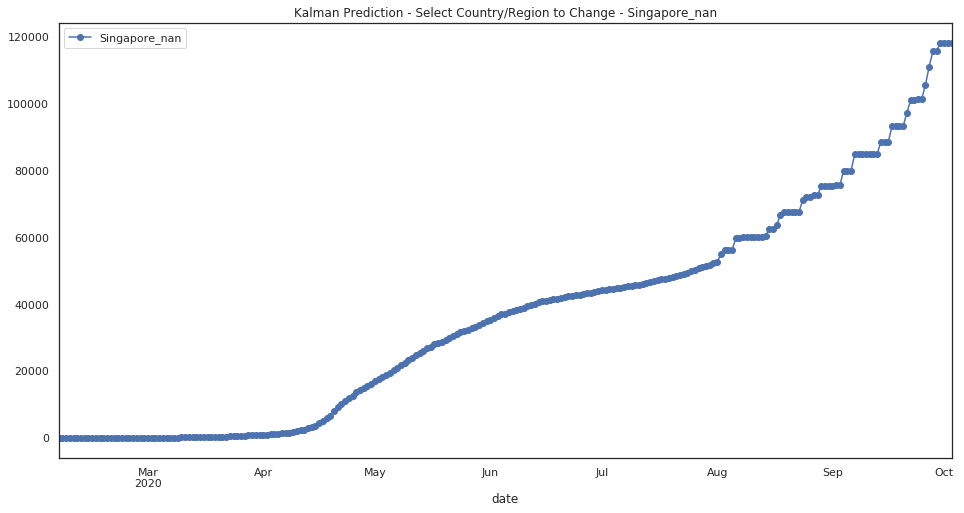

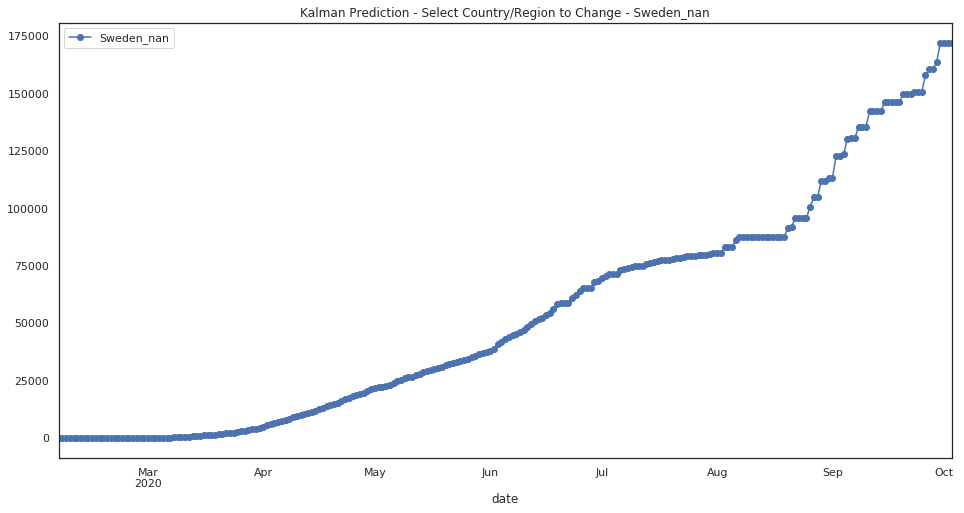

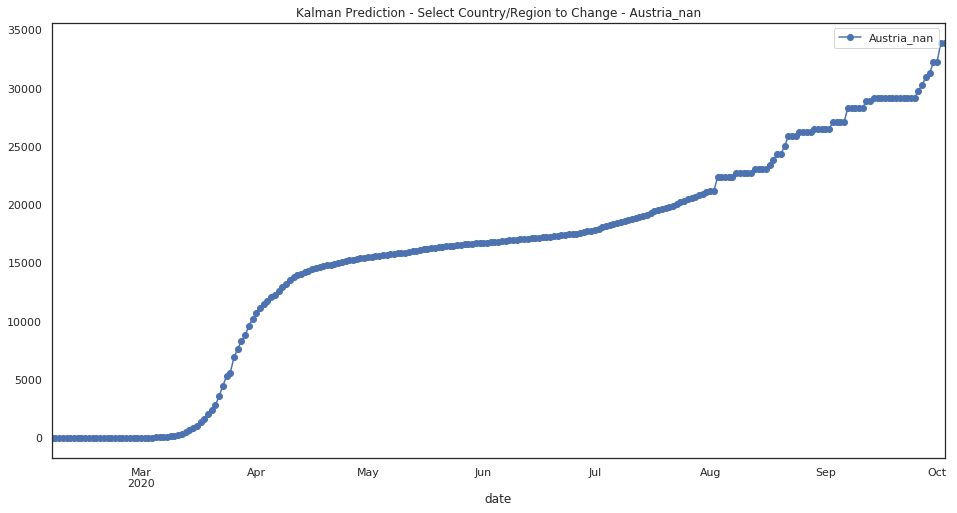

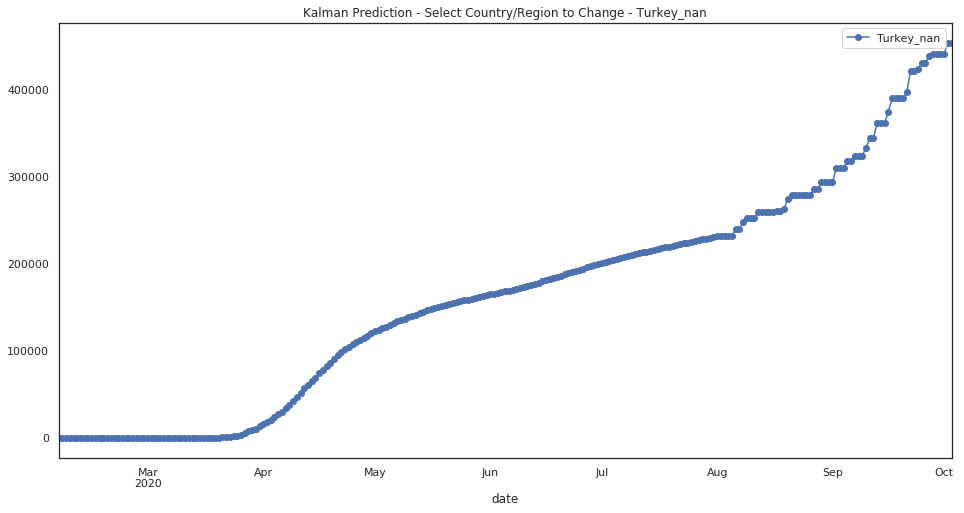

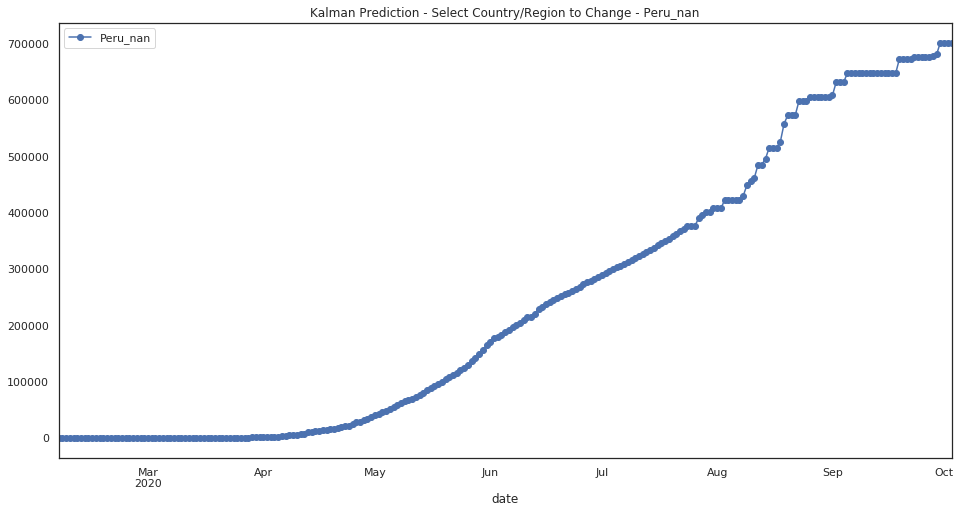

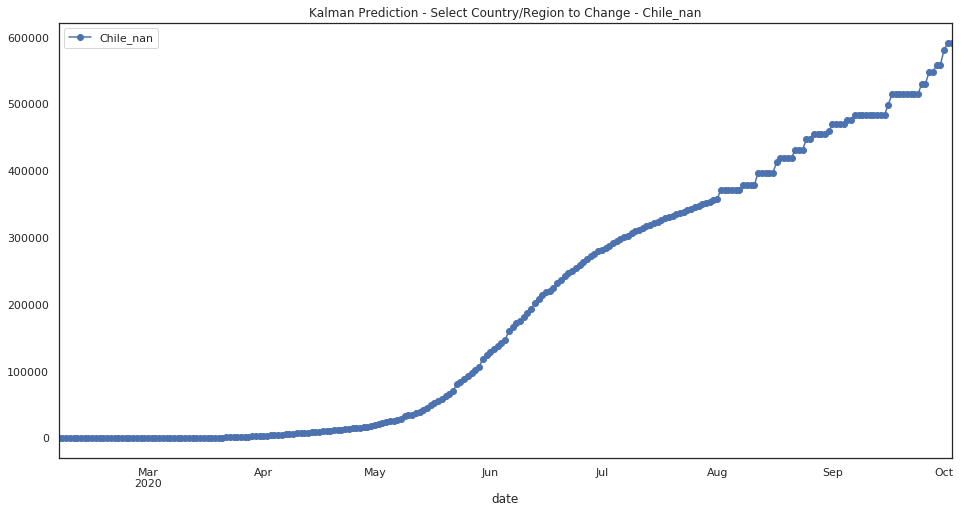

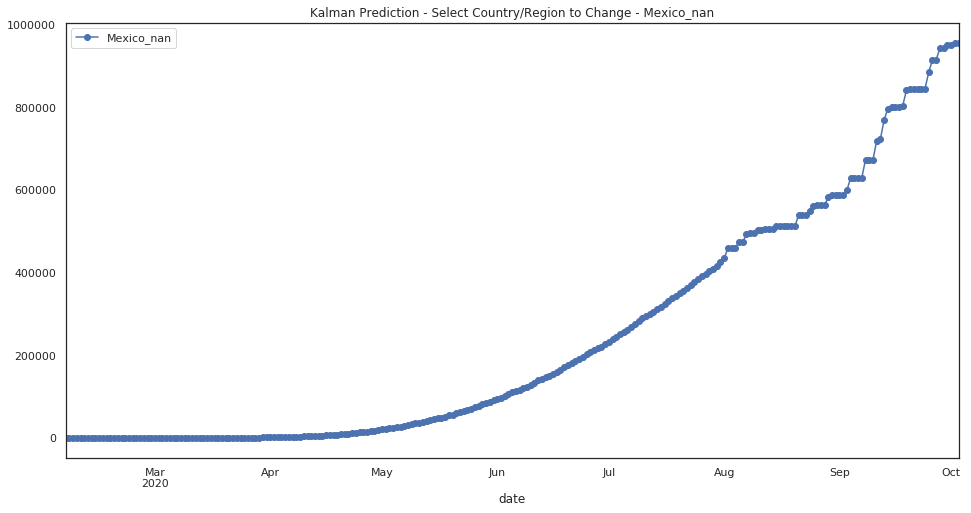

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-10-03 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN      14316908.0
Brazil_nan                                    NaN       6632289.0
India_nan                                     NaN       5193047.0
Russia_nan                                    NaN       1724915.0
South Africa_nan                              NaN       1488094.0
United Kingdom_nan                            NaN       1271260.0
Mexico_nan                                    NaN        956229.0
Peru_nan                                      NaN        701720.0
Pakistan_nan                                  NaN        617143.0
Iran_nan                                      NaN        612412.0
Italy_nan                                     NaN        606939.0
Colombia_nan                                  NaN        602596.0
Chile_nan                                     NaN        592117.0
France_nan                                    NaN        574677.0
Bangladesh_nan                                NaN        553135.0
Spain_nan                                     NaN        491568.0
Saudi Arabia_nan                              NaN        471982.0
Turkey_nan                                    NaN        453968.0
Argentina_nan                                 NaN        446248.0
Germany_nan                                   NaN        334594.0
Iraq_nan                                      NaN        285812.0
Kazakhstan_nan                                NaN        259827.0
Dominican Republic_nan                        NaN        236478.0
Philippines_nan                               NaN        234179.0
Ukraine_nan                                   NaN        228810.0
Indonesia_nan                                 NaN        226257.0
Oman_nan                                      NaN        220843.0
Canada_Quebec                                 NaN        219212.0
Bolivia_nan                                   NaN        216901.0
Sweden_nan                                    NaN        172039.0
...                                           ...             ...
China_Macau                                   NaN           103.0
Saint Vincent and the Grenadines_nan          NaN            80.0
Australia_Northern Territory                  NaN            74.0
Fiji_nan                                      NaN            69.0
Canada_Prince Edward Island                   NaN            67.0
Saint Lucia_nan                               NaN            61.0
Canada_Grand Princess                         NaN            58.0
Netherlands_Curacao                           NaN            51.0
Grenada_nan                                   NaN            50.0
Laos_nan                                      NaN            40.0
Dominica_nan                                  NaN            38.0
Timor-Leste_nan                               NaN            37.0
Holy See_nan                                  NaN            36.0
United Kingdom_Falkland Islands (Malvinas)    NaN            33.0
Canada_Yukon                                  NaN            33.0
Saint Kitts and Nevis_nan                     NaN            32.0
China_Qinghai                                 NaN            31.0
France_New Caledonia                          NaN            30.0
Denmark_Greenland                             NaN            27.0
France_Saint Barthelemy                       NaN            26.0
United Kingdom_Montserrat                     NaN            22.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN            20.0
Western Sahara_nan                            NaN            10.0
MS Zaandam_nan                                NaN             9.0
United Kingdom_British Virgin Islands         NaN             8.0
Canada_Northwest Territories                  NaN             5.0
France_Saint Pierre and Miquelon              NaN             4.0
United Kingdom_Anguilla                       NaN             3.0
Canada_Diamond Princess                       NaN             1.0
China_Tibet           

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-06              9.0          9.0          9.0          9.0   
2020-02-07              9.0          9.0          9.0          9.0   
2020-02-08              9.0          9.0          9.0          9.0   
2020-02-09              9.0          9.0          9.0          9.0   
2020-02-10              9.0          9.0          9.0          9.0   
2020-02-11              9.0          9.0          9.0          9.0   
2020-02-12              9.0          9.0          9.0          9.0   
2020-02-13              9.0          9.0          9.0          9.0   
2020-02-14              9.0          9.0          9.0          9.0   
2020-02-15              9.0          9.0          9.0          9.0   
2020-02-16              9.0          9.0          9.0          9.0   
2020-02-17              9.0          9.0          9.0          9.0   
2020-02-18              5.0          9.0         18.0          9.0   
2020-02-19             12.0          9.0         18.0          9.0   
2020-02-20              6.0          9.0         21.0          9.0   
2020-02-21              4.0          9.0         19.0          9.0   
2020-02-22             12.0          9.0         19.0          9.0   
2020-02-23             14.0          9.0         21.0          9.0   
2020-02-24             15.0          9.0         12.0          9.0   
2020-02-25             14.0          9.0         23.0          9.0   
2020-02-26              4.0          9.0         20.0          9.0   
2020-02-27              4.0          9.0          2.0          9.0   
2020-02-28              6.0          9.0         13.0          9.0   
2020-02-29              7.0          9.0         17.0          9.0   
2020-03-01              7.0          9.0         21.0          9.0   
2020-03-02              8.0          9.0         21.0          9.0   
2020-03-03             10.0          9.0         15.0         11.0   
2020-03-04              7.0          9.0         40.0          1.0   
2020-03-05              5.0          9.0         80.0          1.0   
2020-03-06              6.0          9.0         59.0          5.0   
...                     ...          ...          ...          ...   
2020-09-05          55386.0       7519.0      43967.0       1232.0   
2020-09-06          56530.0       7519.0      43945.0       1232.0   
2020-09-07          55889.0       7505.0      44485.0       1232.0   
2020-09-08          55889.0       7900.0      47161.0       1232.0   
2020-09-09          55991.0       7779.0      46163.0       1232.0   
2020-09-10          55402.0       7779.0      46368.0       1232.0   
2020-09-11          56709.0       7819.0      49469.0       1232.0   
2020-09-12          56238.0       7819.0      51898.0       1232.0   
2020-09-13          56215.0       7819.0      50617.0       1288.0   
2020-09-14          56215.0       7819.0      53103.0       1288.0   
2020-09-15          60687.0       7779.0      52543.0       1288.0   
2020-09-16          59094.0       7984.0      52953.0       1293.0   
2020-09-17          63599.0       8195.0      53085.0       1367.0   
2020-09-18          62406.0       8121.0      52707.0       1367.0   
2020-09-19          63629.0       8530.0      52110.0       1367.0   
2020-09-20          63870.0       8428.0      56248.0       1367.0   
2020-09-21          64673.0       8428.0      54576.0       1449.0   
2020-09-22          63935.0       8491.0      57812.0       1449.0   
2020-09-23          65252.0       8461.0      56870.0       1482.0   
2020-09-24          69326.0       8426.0      62563.0       1573.0   
2020-09-25          67578.0       8426.0      61115.0       1581.0   
2020-09-26          67550.0       8388.0      60701.0       1624.0   
2020-09-27          70539.0       8388.0      68023.0       1673.0   
2020-09-28          69670.0       8517.0      69955.0       1724.0   
2020-09-29

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
#pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'Russia_nan',
 'South Africa_nan',
 'United Kingdom_nan',
 'Mexico_nan',
 'Peru_nan',
 'Pakistan_nan',
 'Iran_nan',
 'Italy_nan',
 'Colombia_nan',
 'Chile_nan',
 'France_nan',
 'Bangladesh_nan',
 'Spain_nan',
 'Saudi Arabia_nan',
 'Turkey_nan',
 'Argentina_nan',
 'Germany_nan',
 'Iraq_nan',
 'Kazakhstan_nan',
 'Dominican Republic_nan',
 'Philippines_nan',
 'Ukraine_nan',
 'Indonesia_nan',
 'Oman_nan',
 'Canada_Quebec',
 'Bolivia_nan',
 'Sweden_nan',
 'Panama_nan',
 'Netherlands_nan',
 'Belgium_nan',
 'Egypt_nan',
 'Poland_nan',
 'Qatar_nan',
 'Belarus_nan',
 'Japan_nan',
 'Kuwait_nan',
 'Portugal_nan',
 'Ghana_nan',
 'Ecuador_nan',
 'Israel_nan',
 'China_Hubei',
 'Romania_nan',
 'United Arab Emirates_nan',
 'Singapore_nan',
 'Morocco_nan',
 'Guatemala_nan',
 'Ireland_nan',
 'Honduras_nan',
 'Nigeria_nan',
 'Bahrain_nan',
 'Kyrgyzstan_nan',
 'Switzerland_nan',
 'Afghanistan_nan',
 'Algeria_nan',
 'Armenia_nan',
 'El Salvador_nan',
 'Az

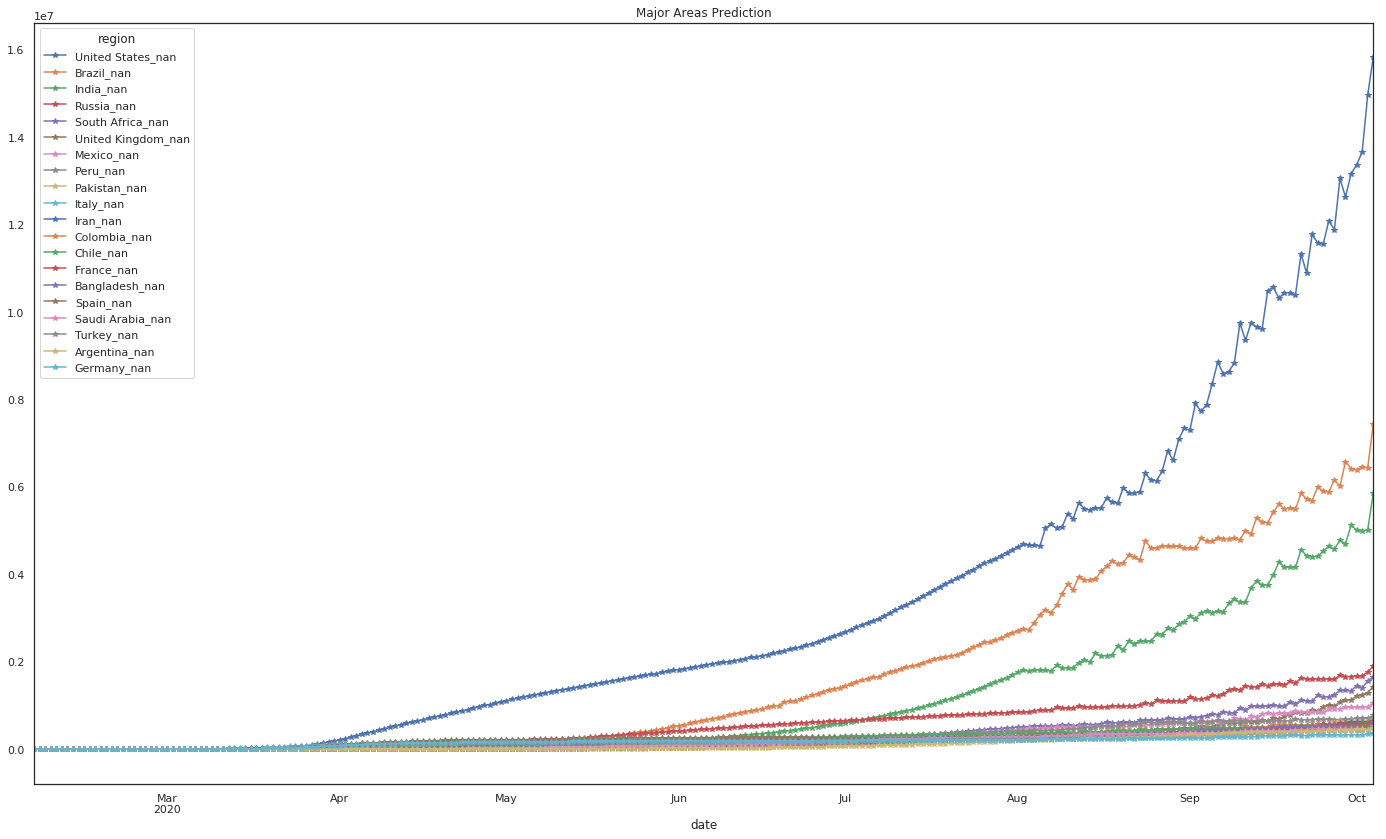

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

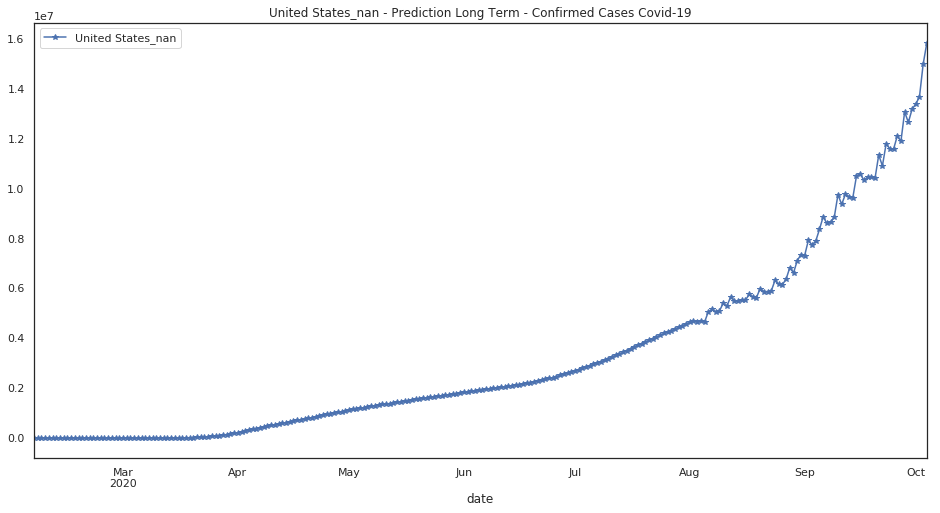

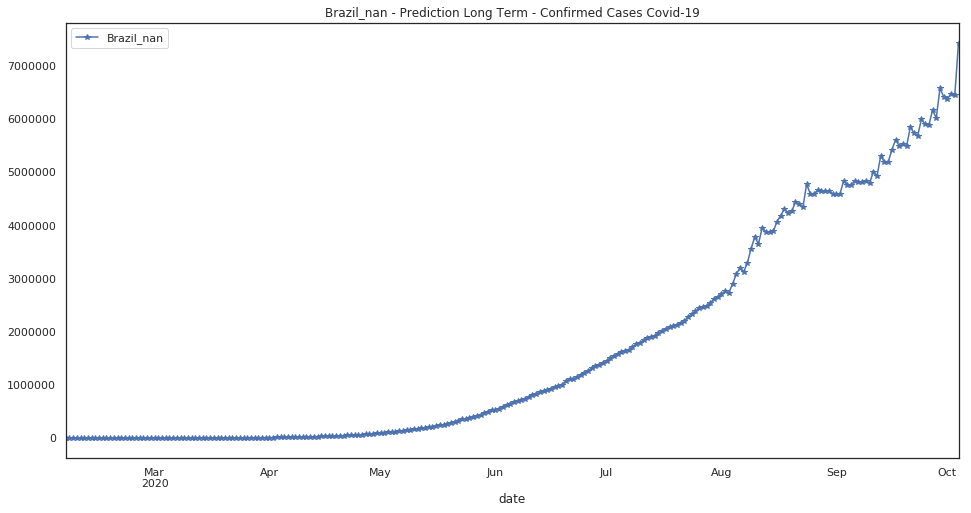

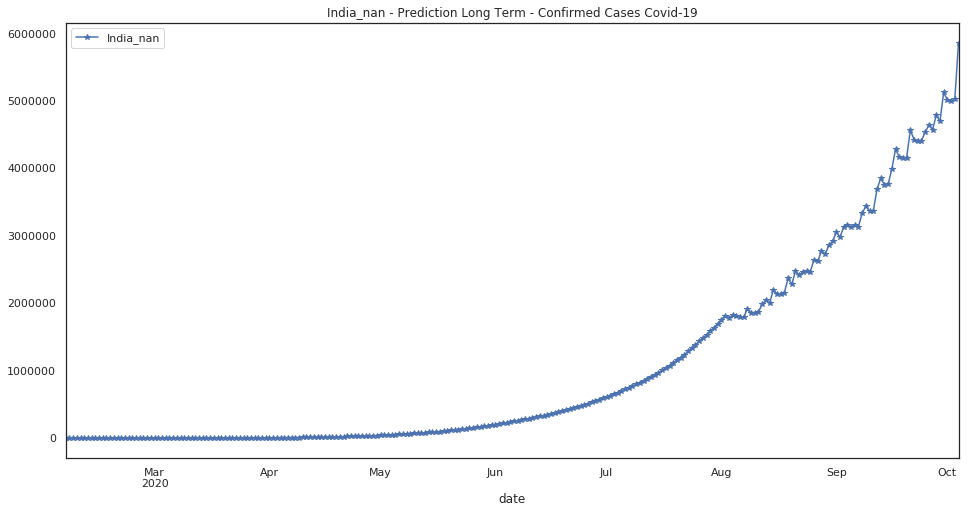

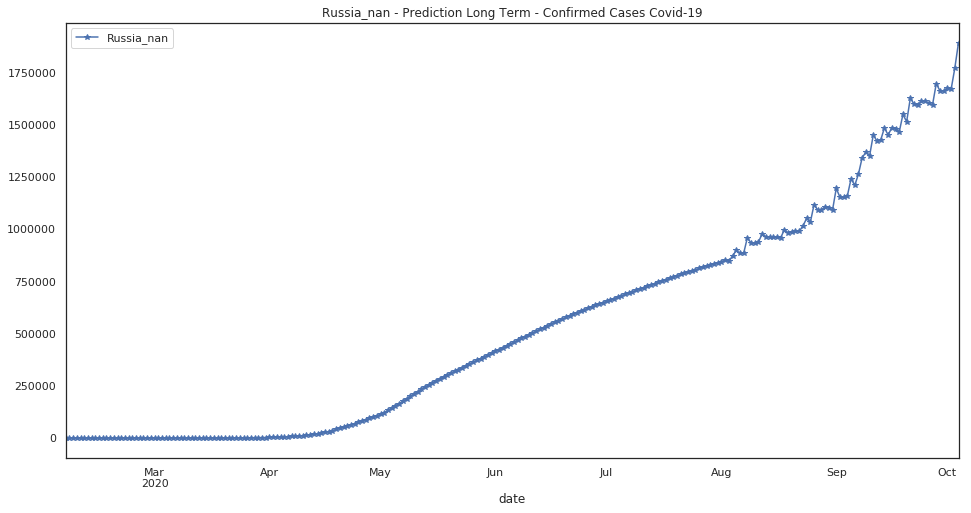

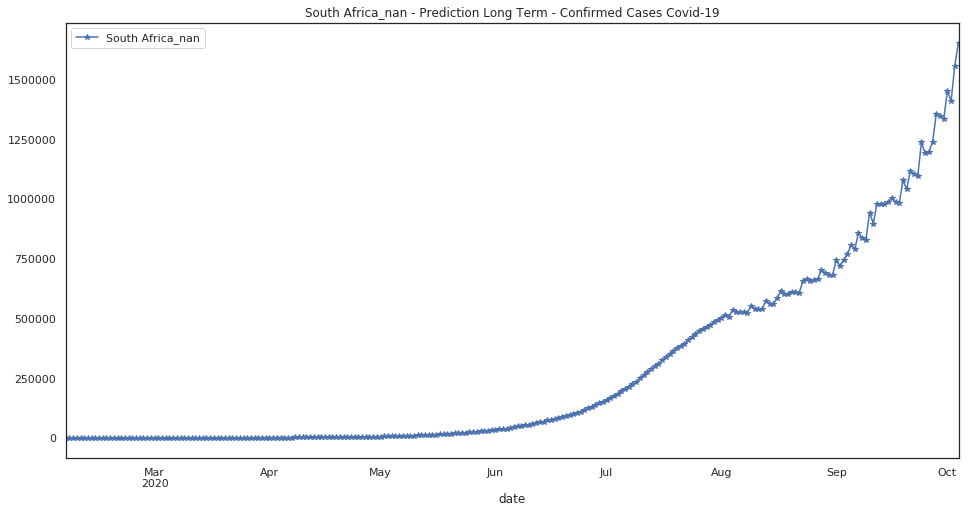

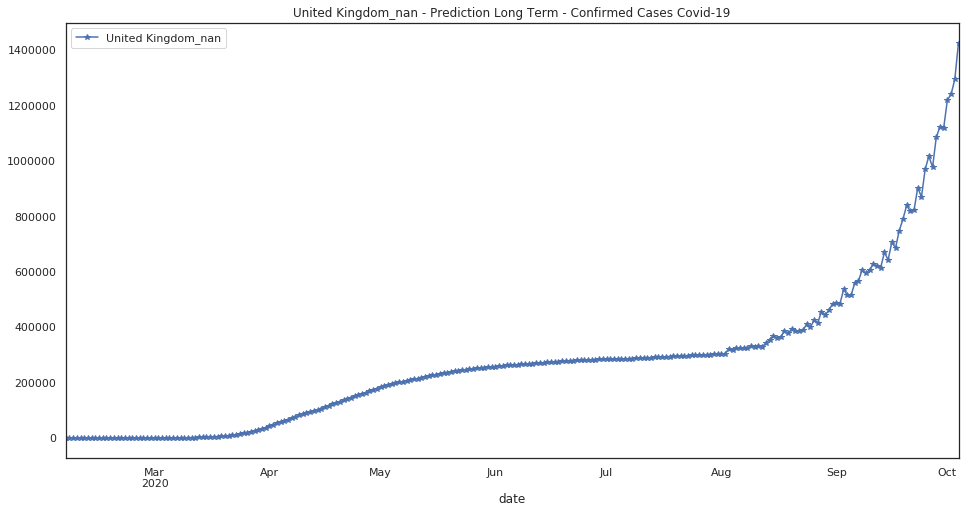

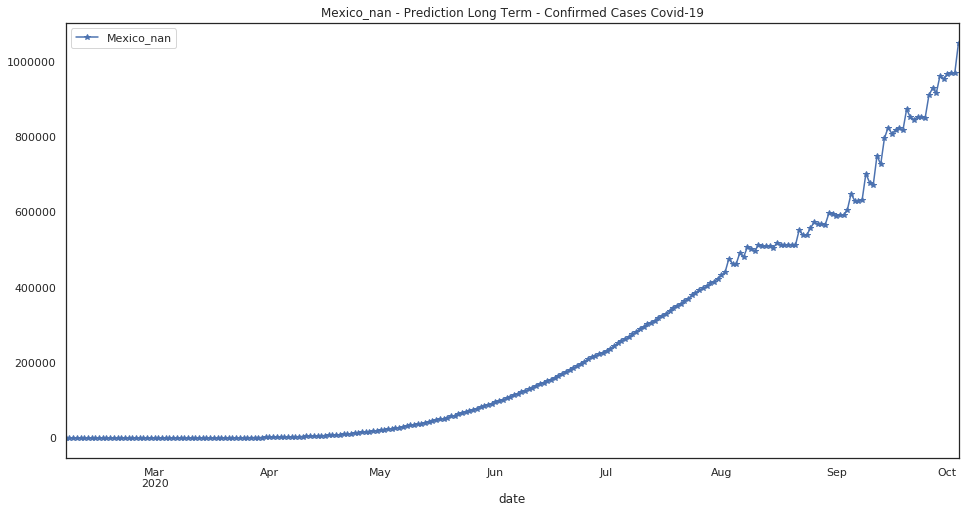

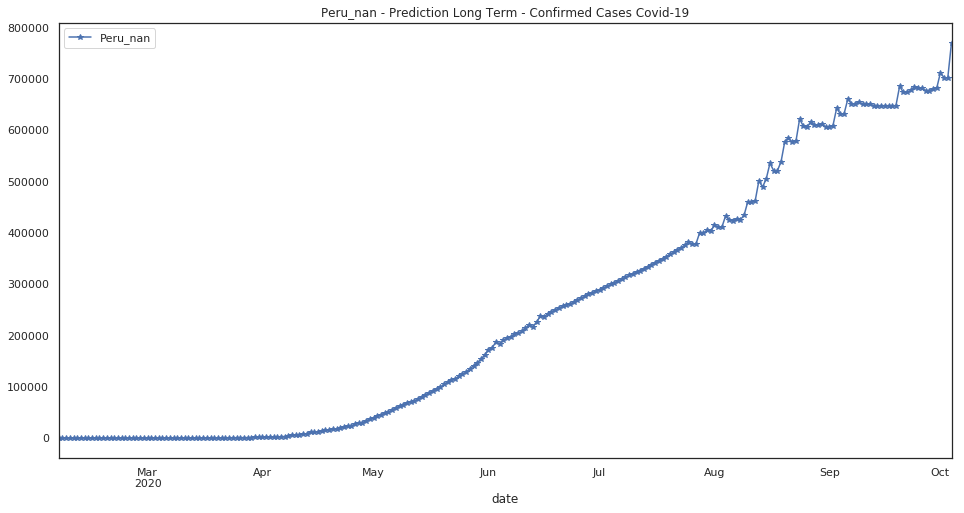

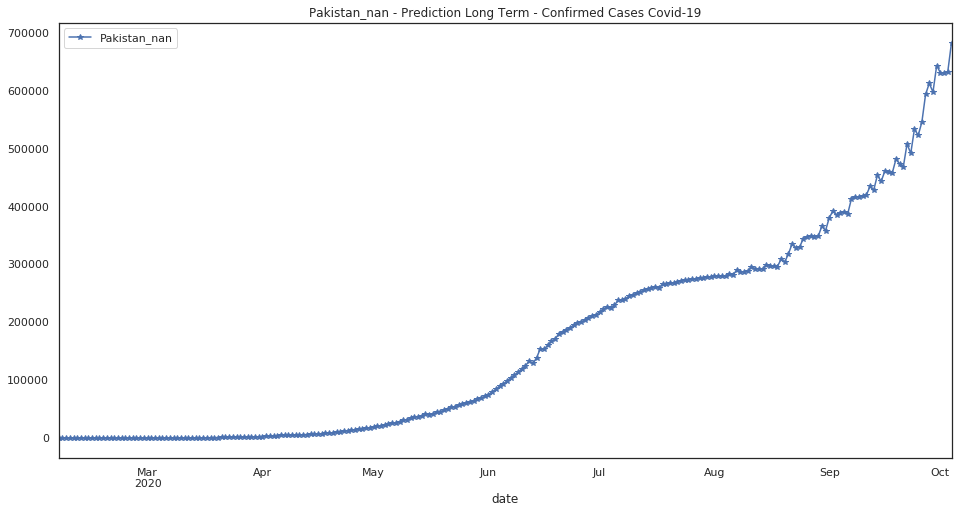

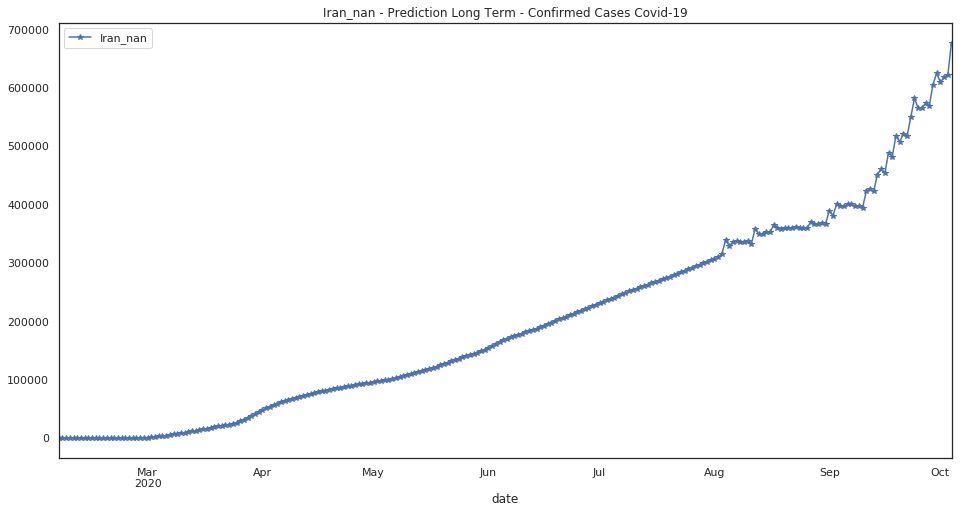

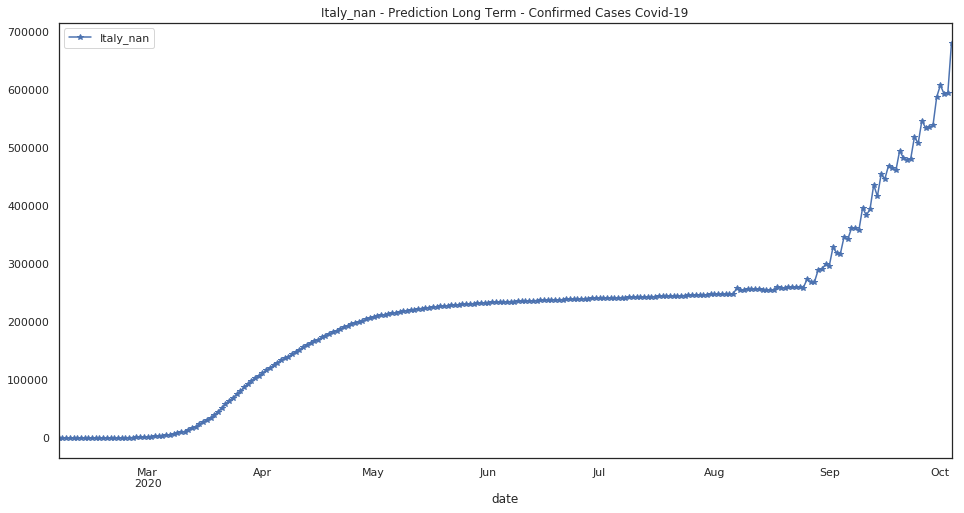

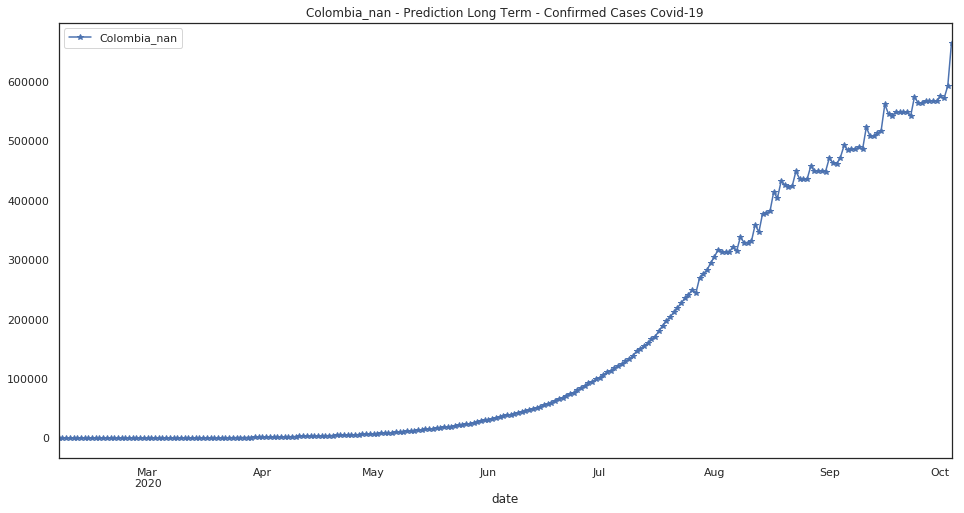

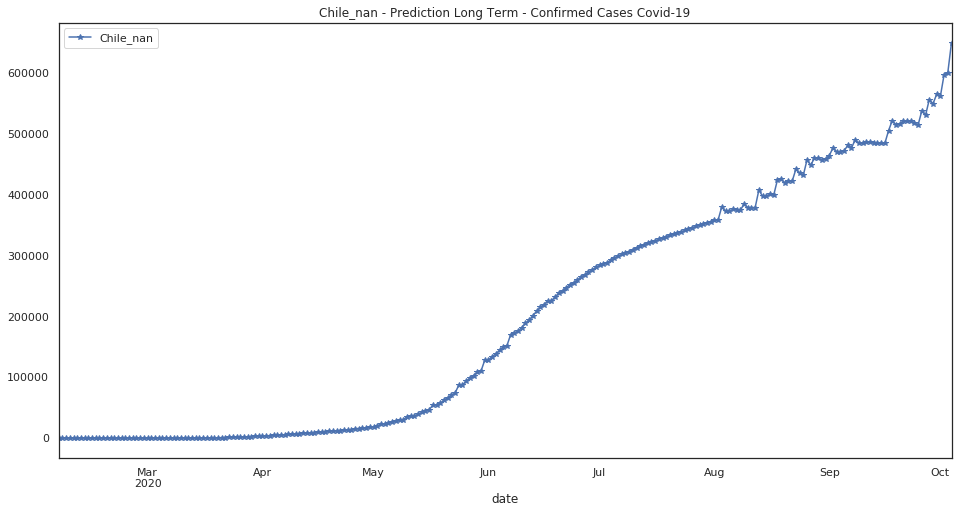

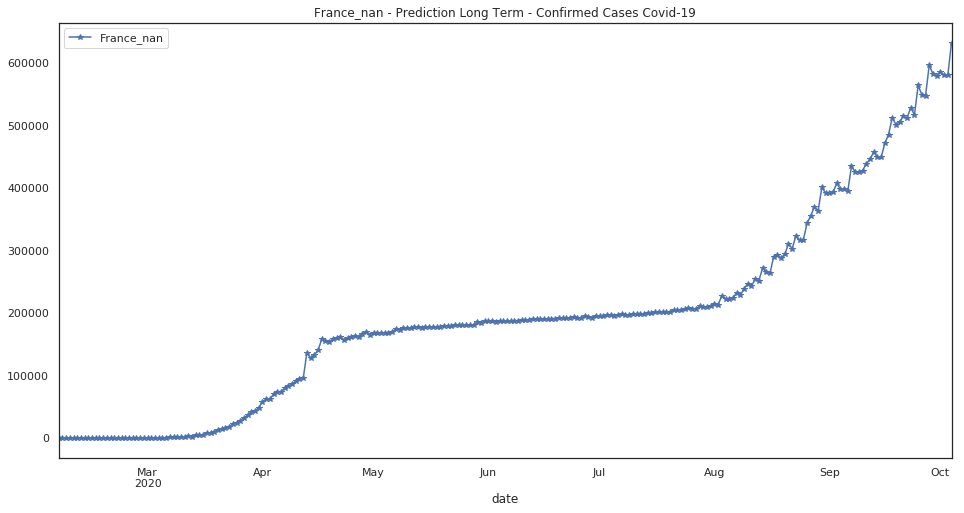

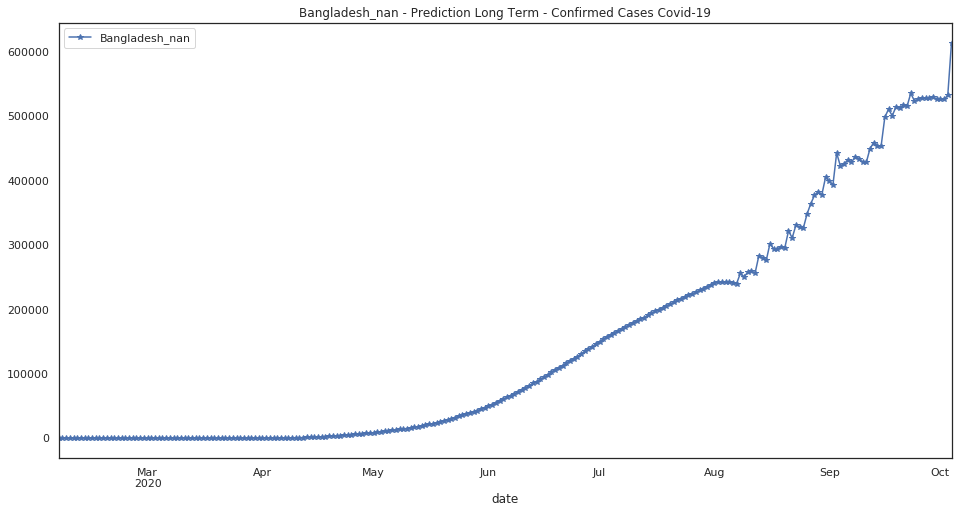

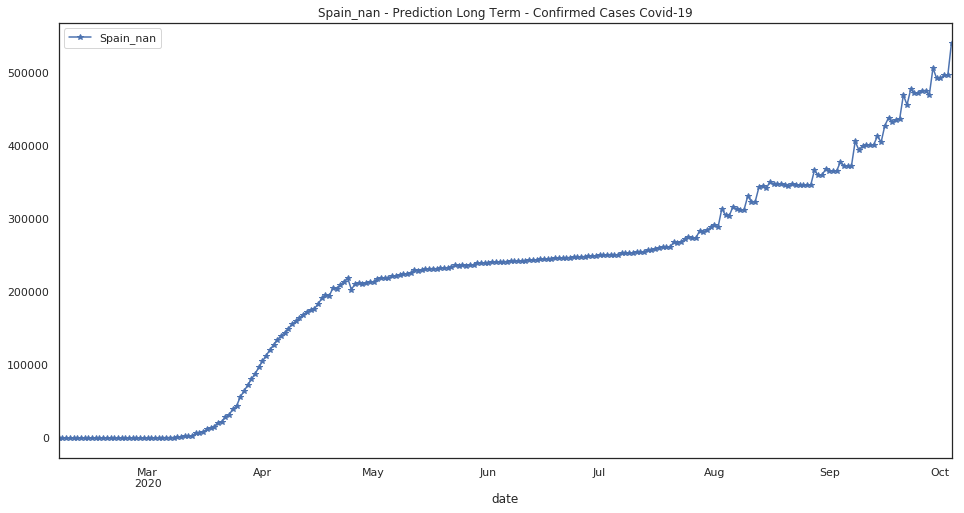

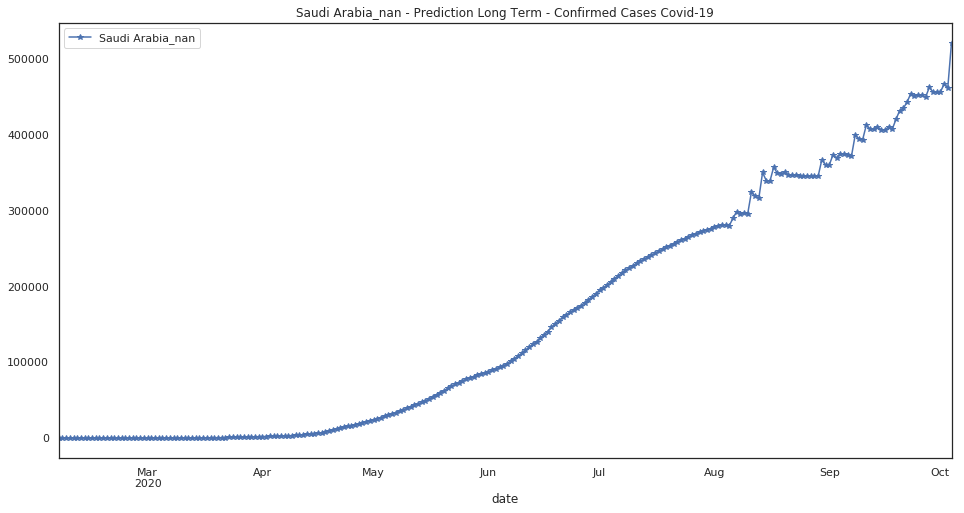

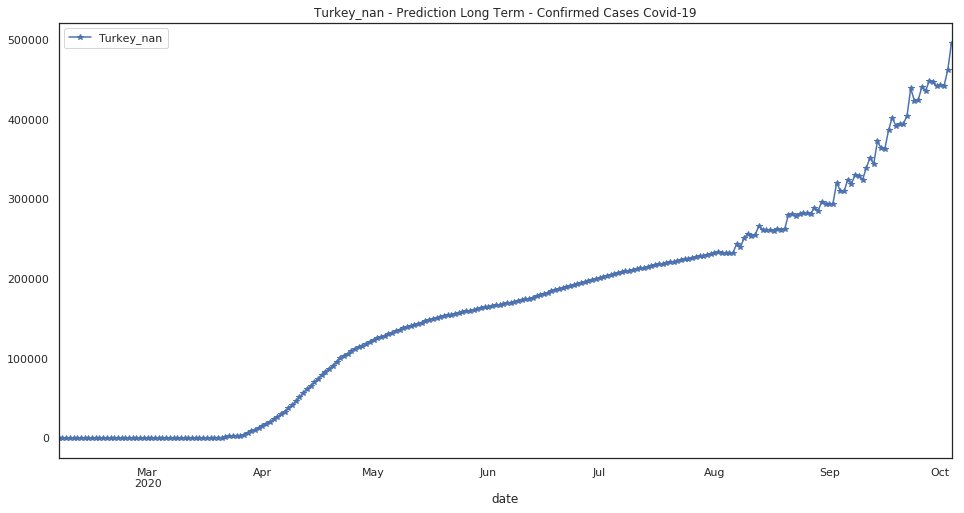

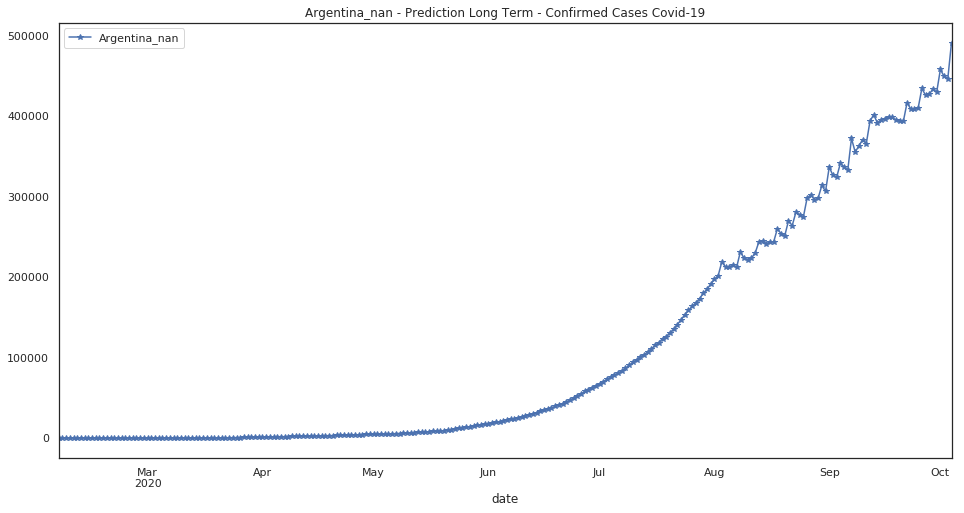

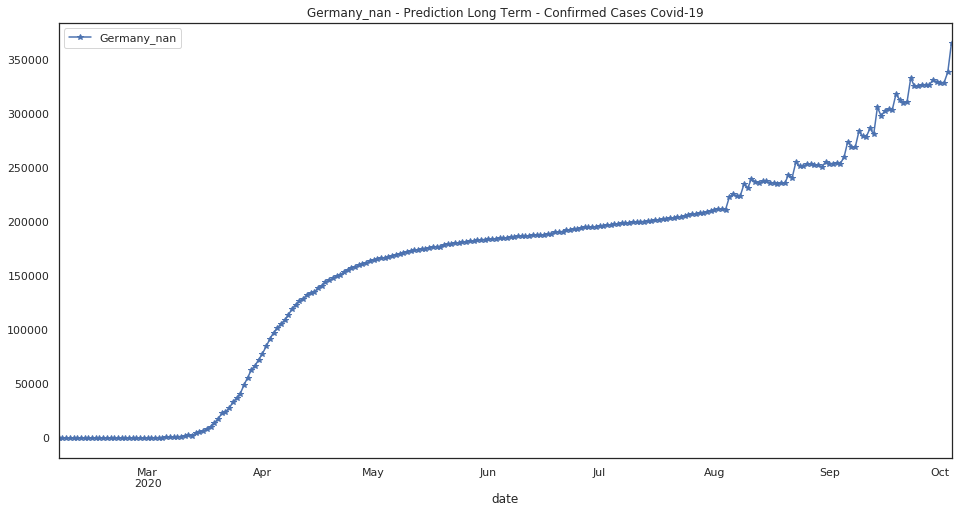

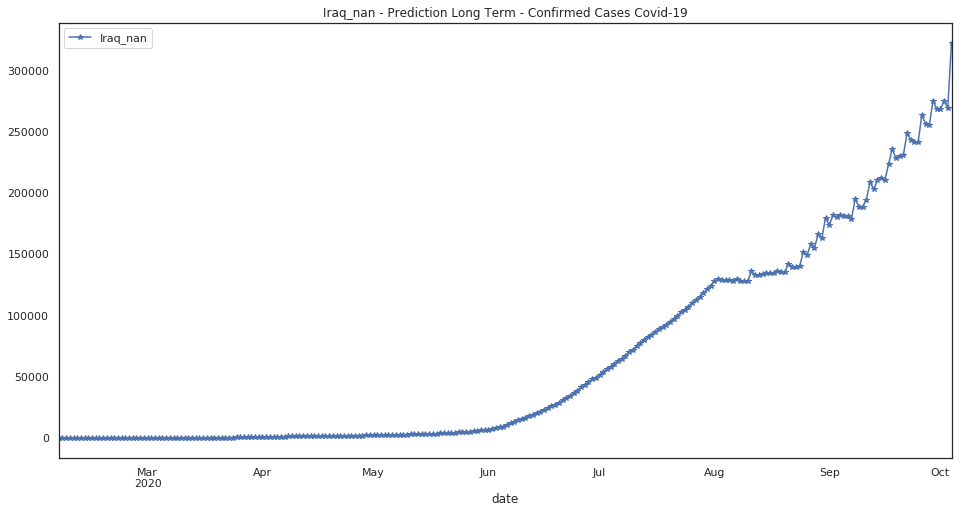

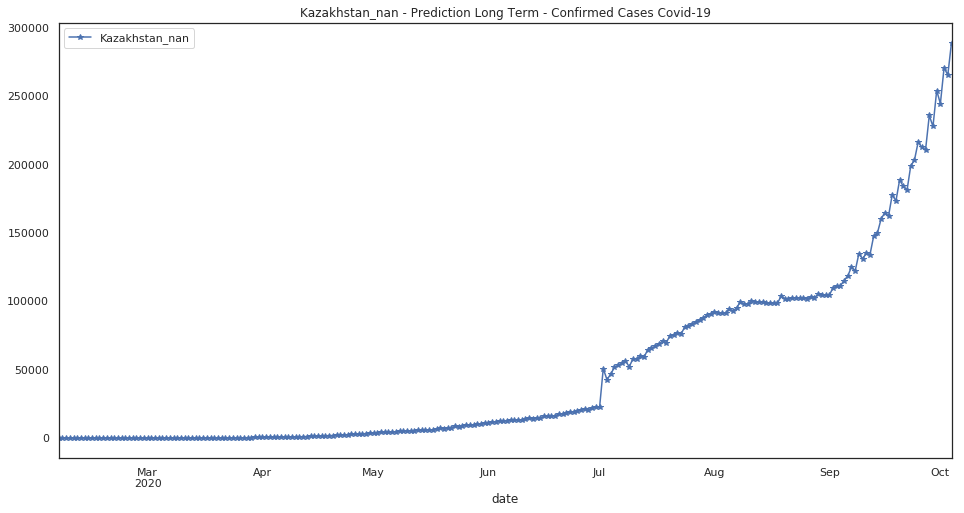

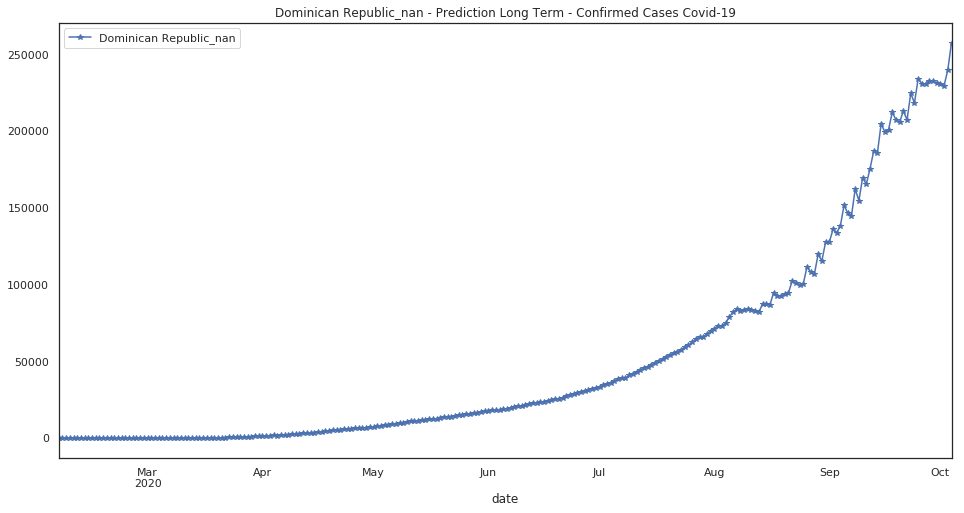

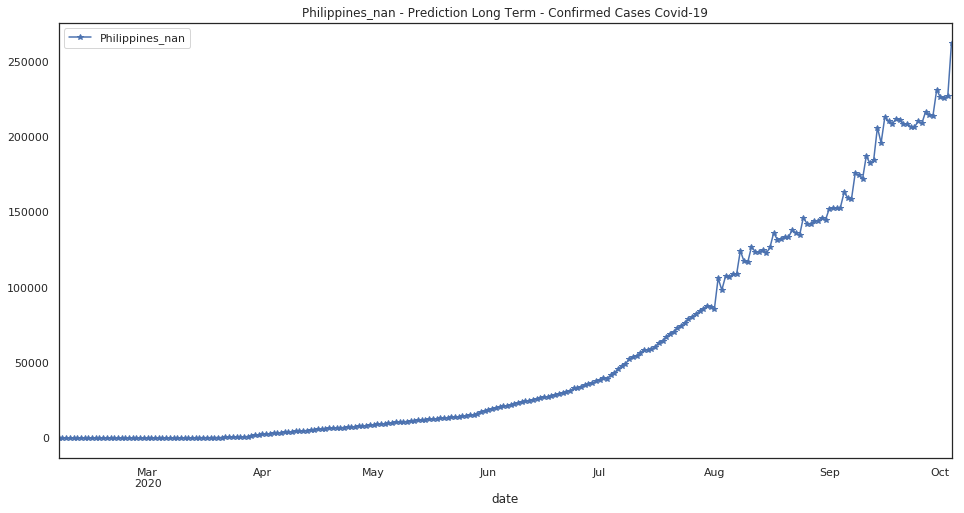

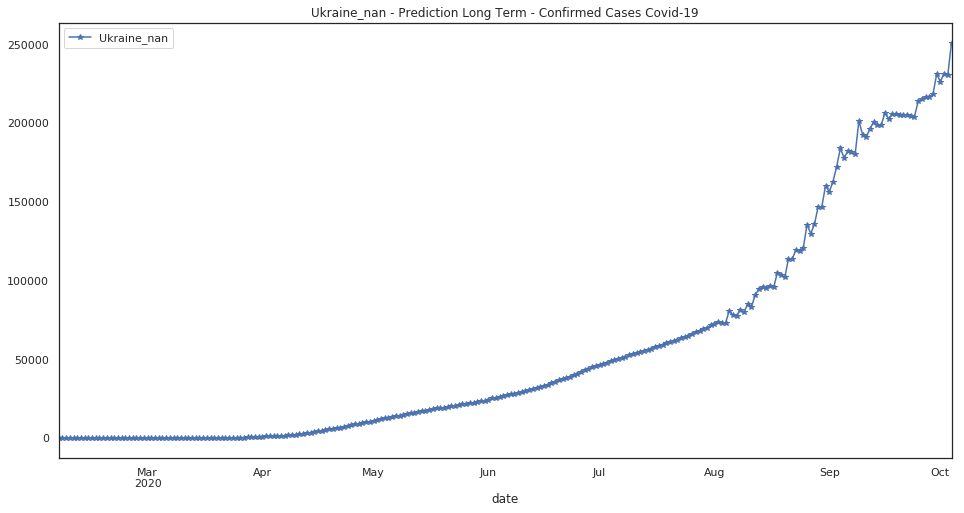

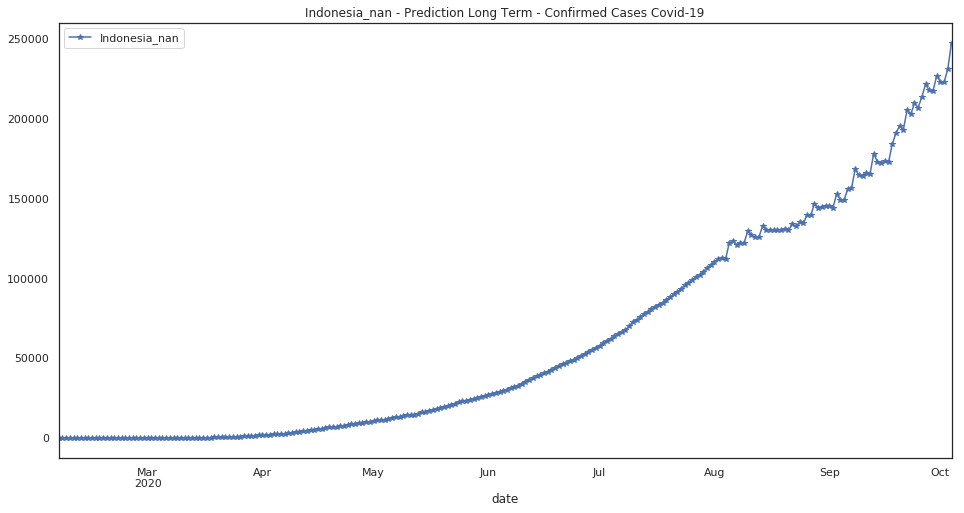

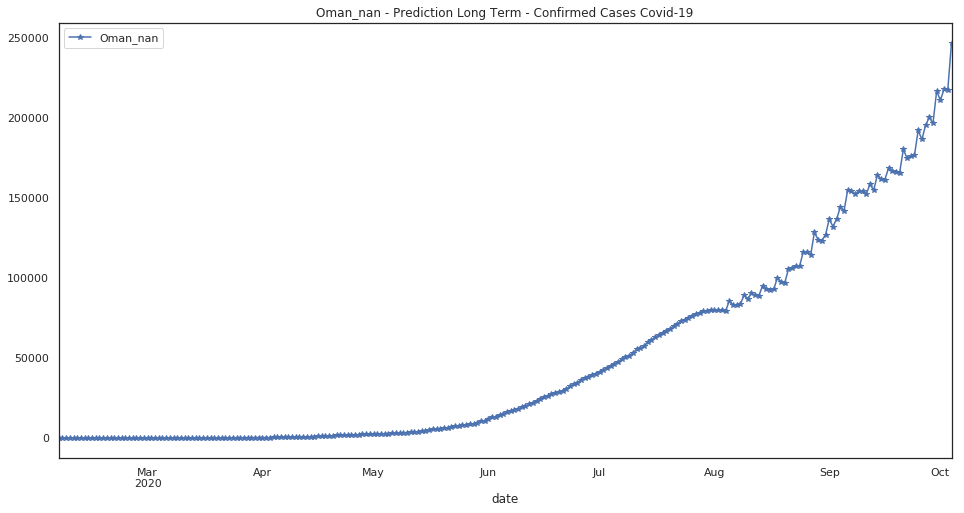

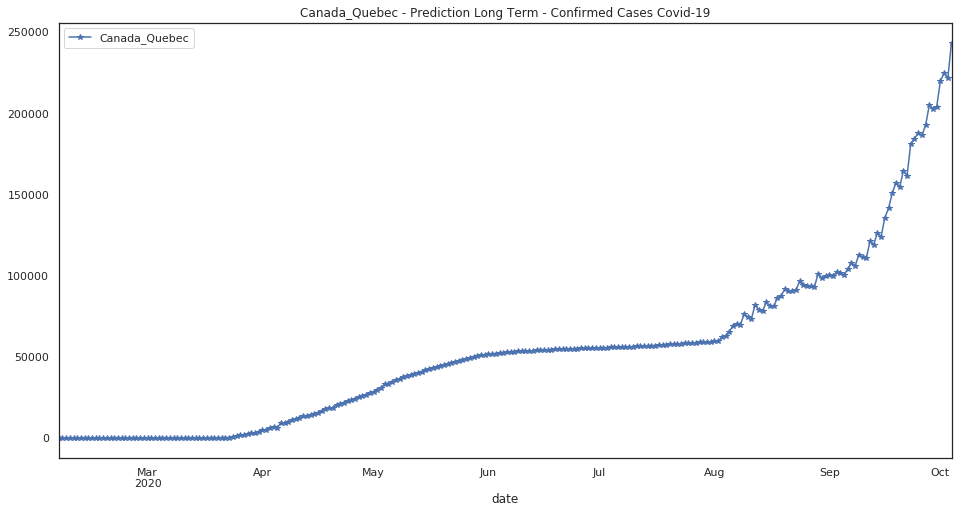

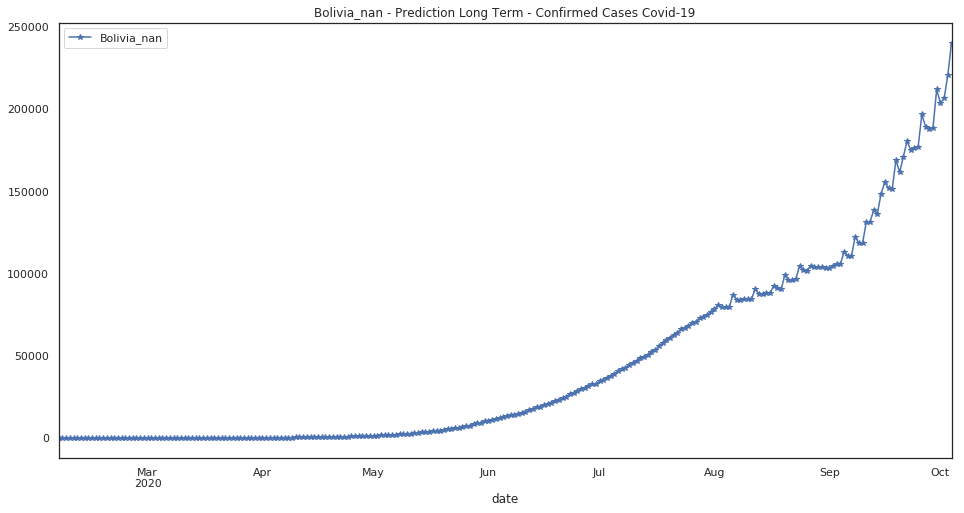

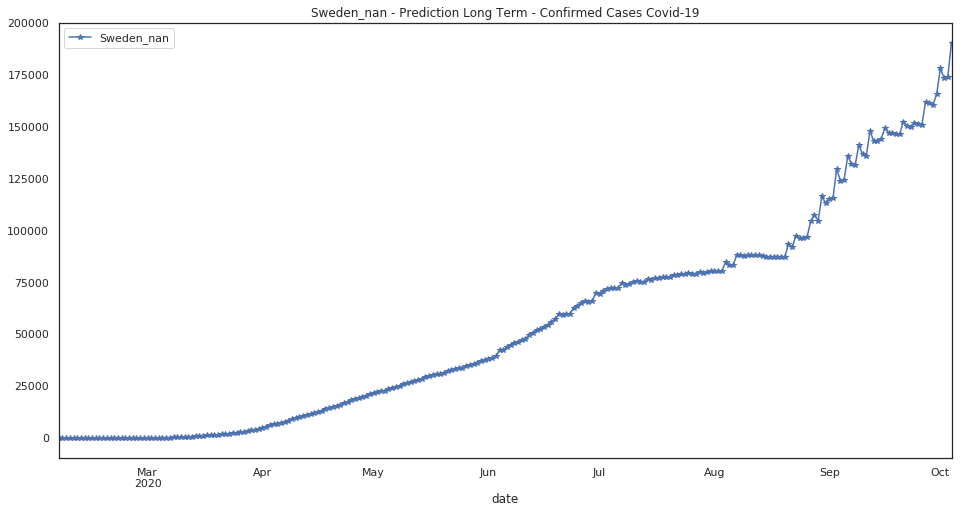

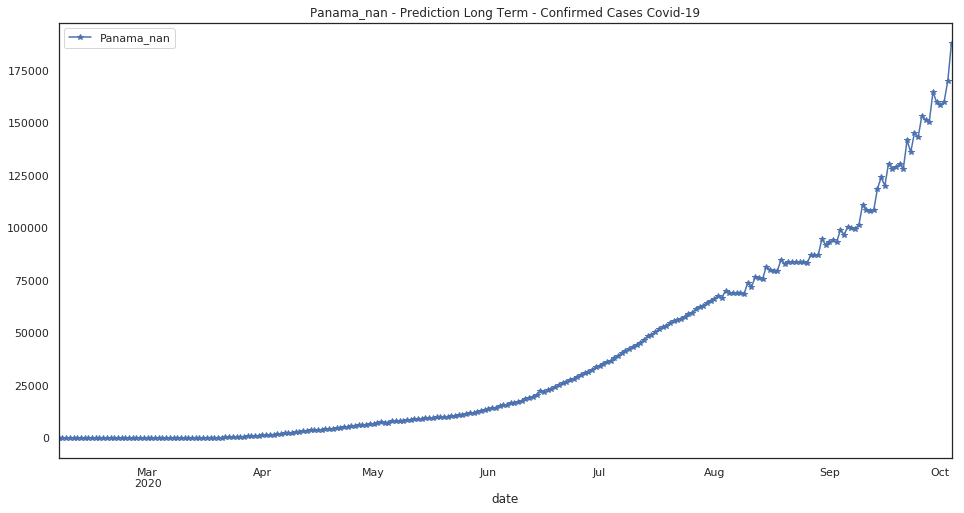

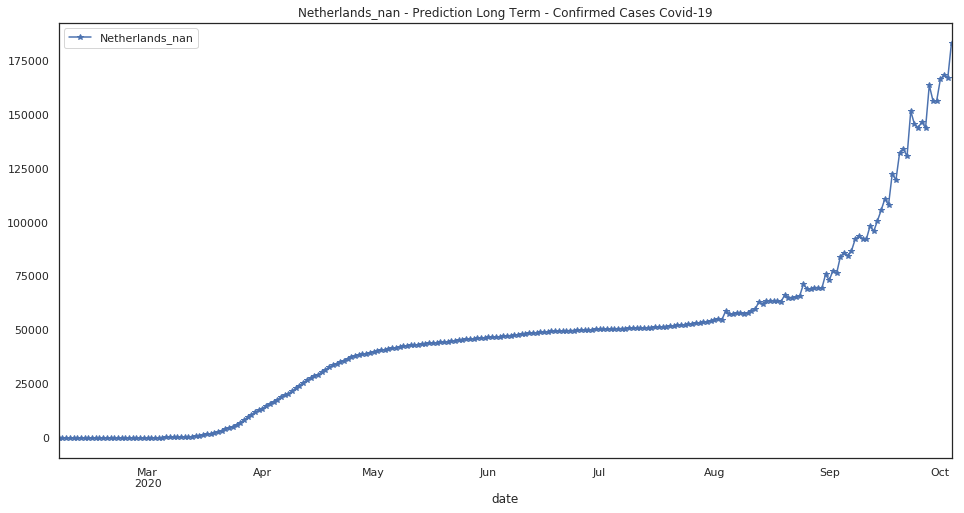

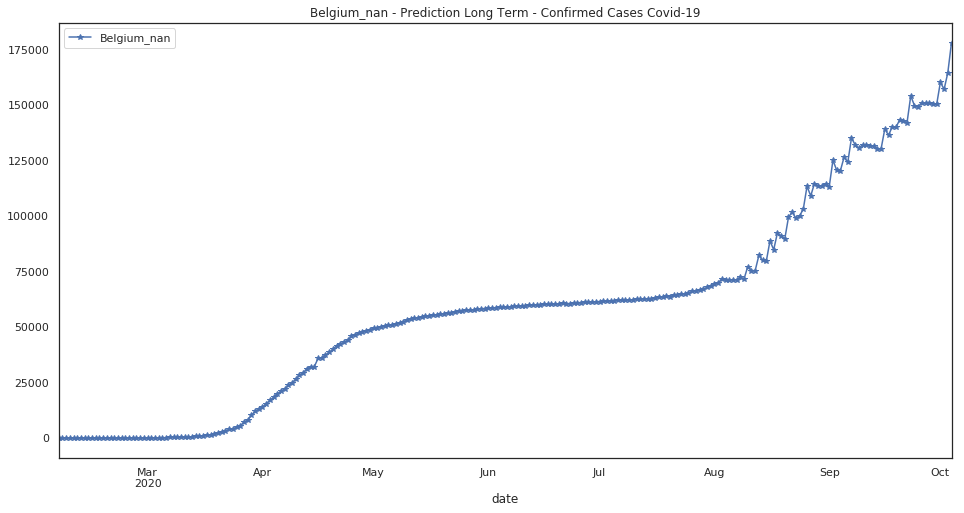

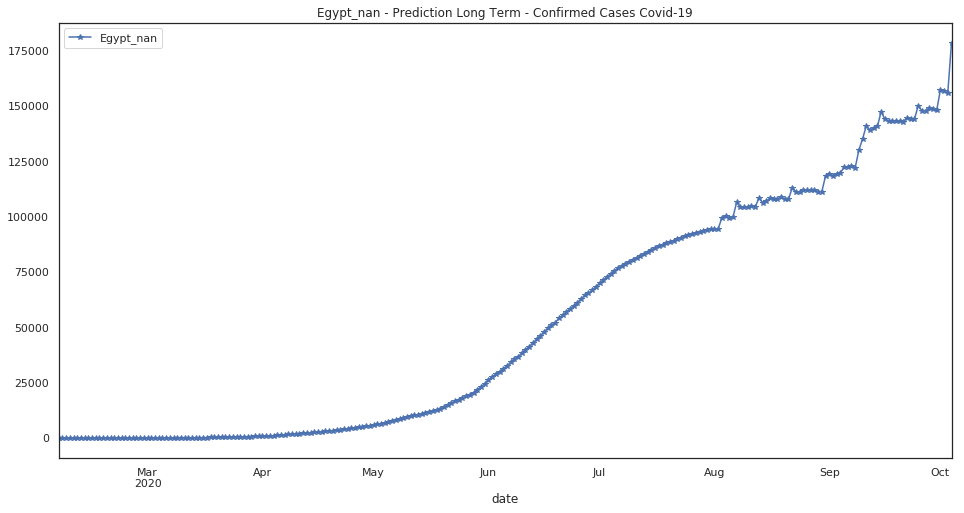

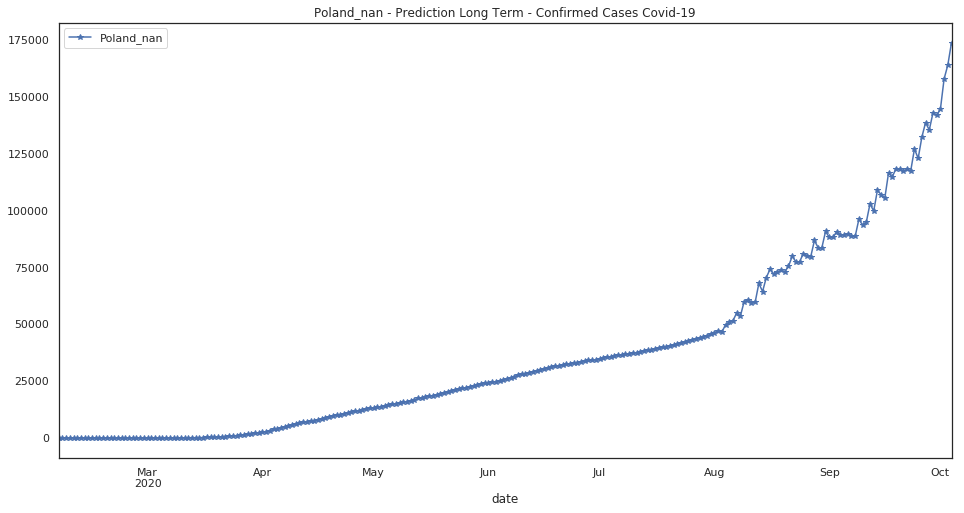

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

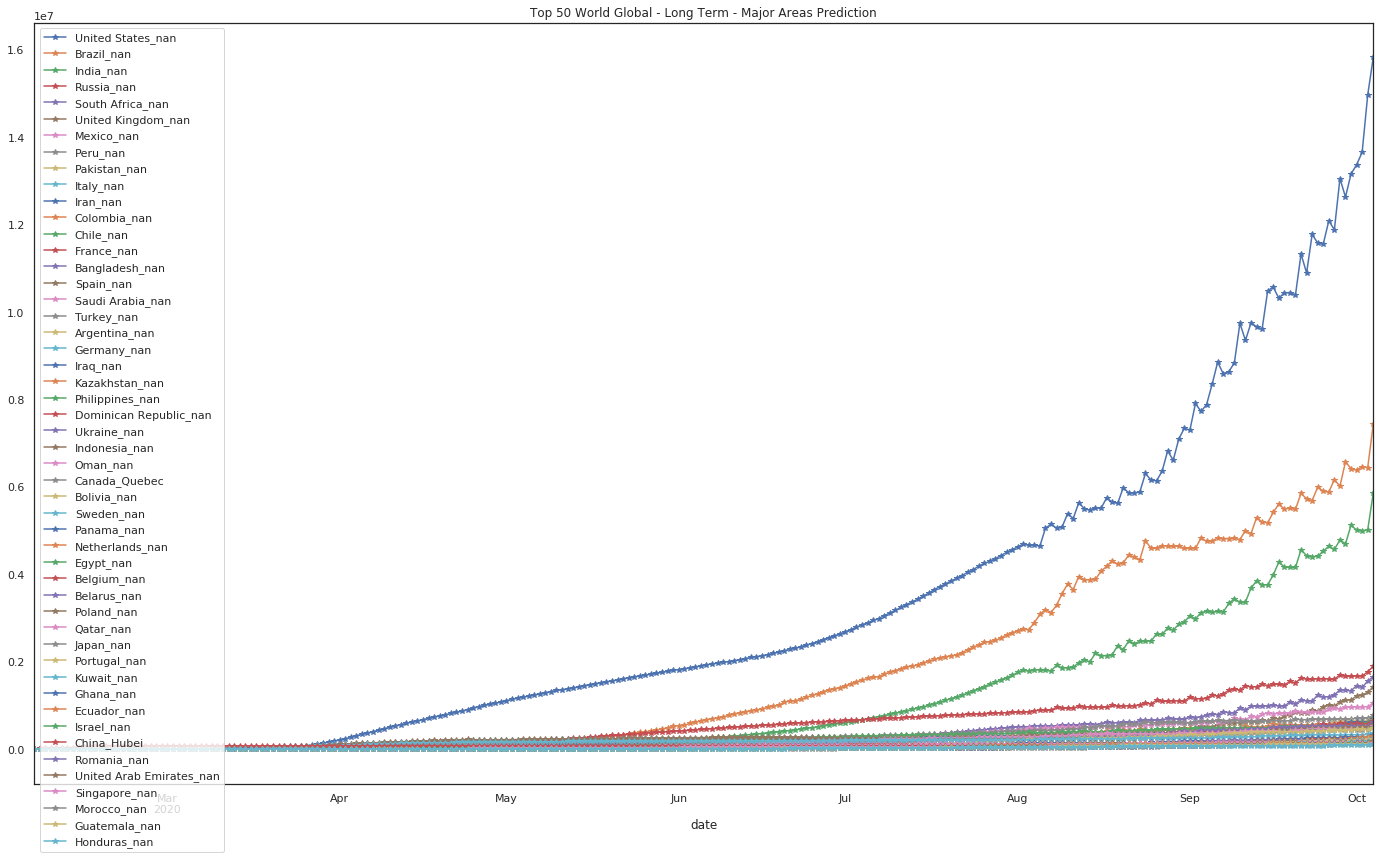

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

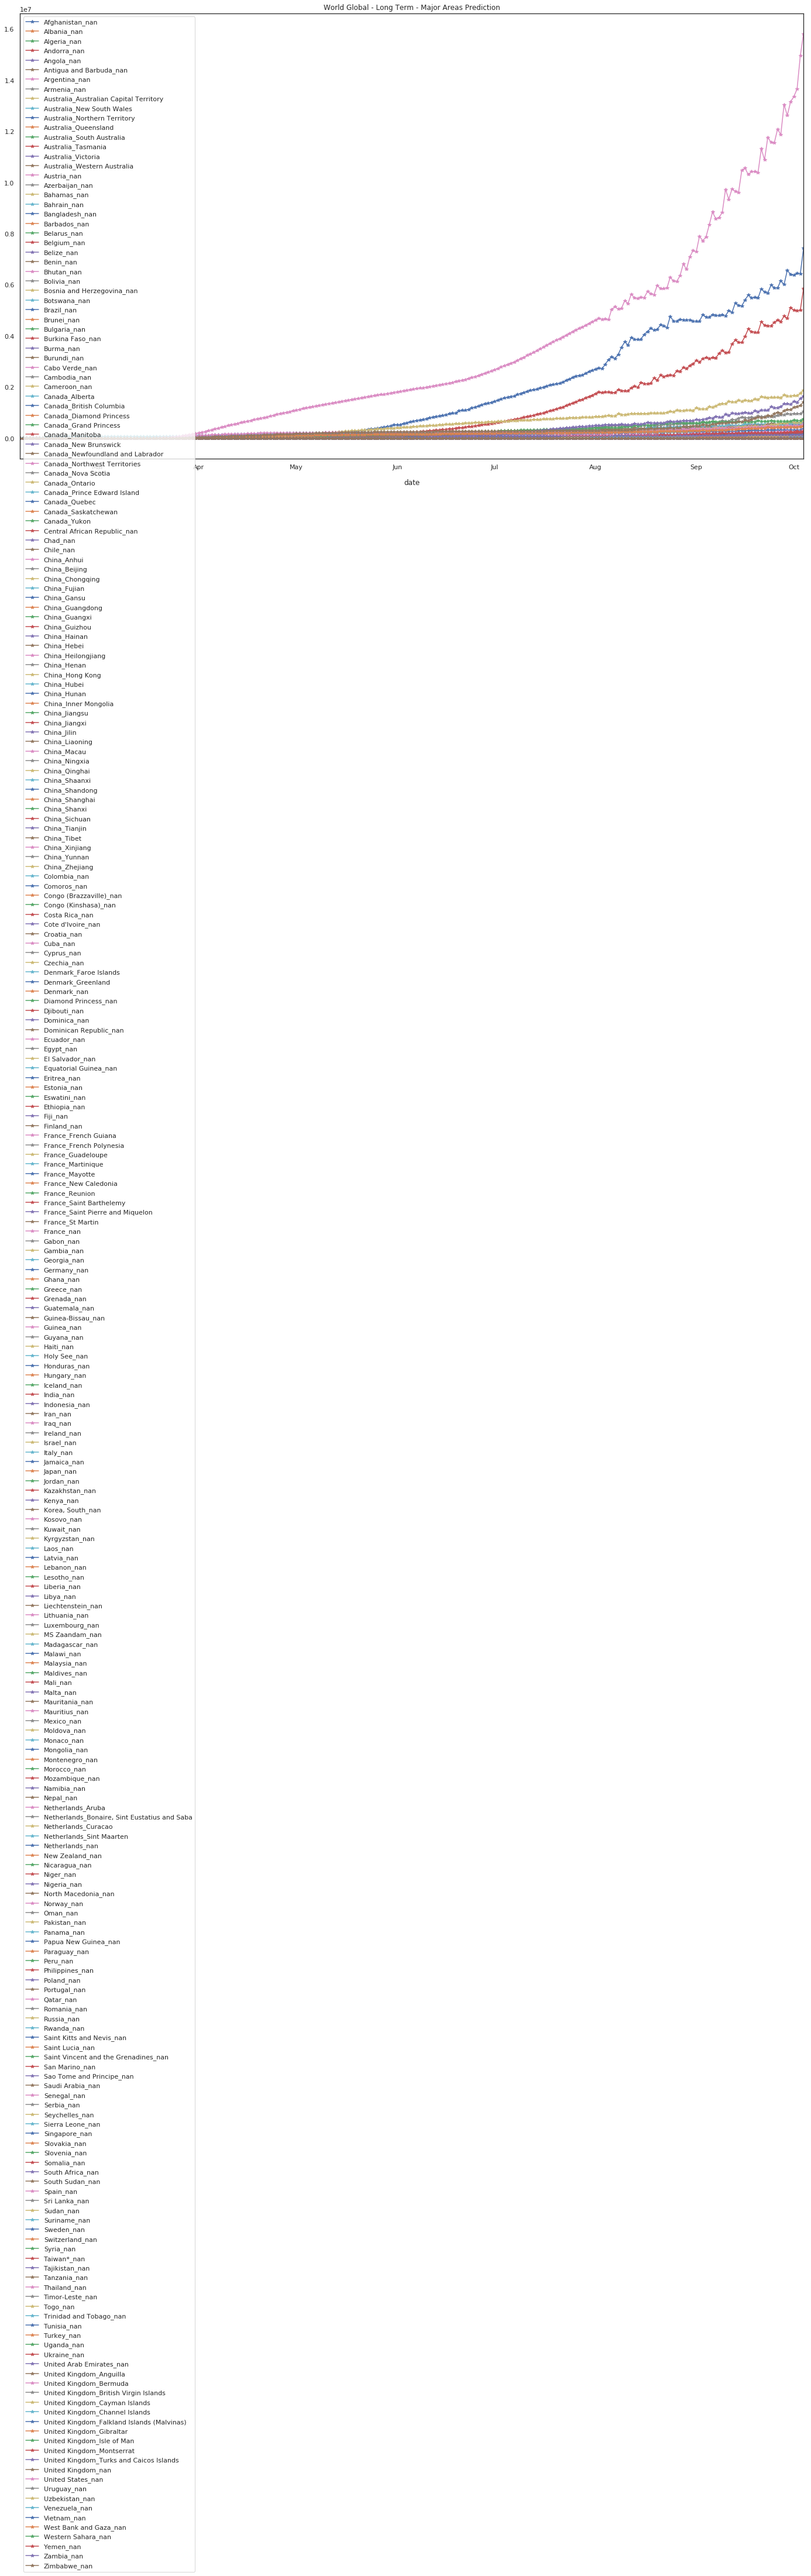

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-22             36.0         88.0        189.0        224.0   
2020-03-23             57.0        104.0        263.0        290.0   
2020-03-24             50.0        119.0        275.0        243.0   
2020-03-25            102.0        140.0        318.0        186.0   
2020-03-26            106.0        167.0        365.0        210.0   
2020-03-27            117.0        201.0        448.0        249.0   
2020-03-28            141.0        207.0        484.0        293.0   
2020-03-29            135.0        220.0        525.0        334.0   
2020-03-30            142.0        240.0        587.0        351.0   
2020-03-31            220.0        248.0        664.0        397.0   
2020-04-01            188.0        271.0        827.0        389.0   
2020-04-02            282.0        283.0        958.0        404.0   
2020-04-03            315.0        297.0       1096.0        455.0   
2020-04-04            305.0        330.0       1331.0        442.0   
2020-04-05            338.0        360.0       1373.0        469.0   
2020-04-06            412.0        389.0       1452.0        510.0   
2020-04-07            401.0        403.0       1603.0        525.0   
2020-04-08            482.0        405.0       1602.0        545.0   
2020-04-09            480.0        431.0       1726.0        565.0   
2020-04-10            526.0        436.0       1807.0        583.0   
2020-04-11            572.0        437.0       1877.0        601.0   
2020-04-12            603.0        457.0       1928.0        601.0   
2020-04-13            661.0        463.0       2037.0        640.0   
2020-04-14            726.0        487.0       2094.0        646.0   
2020-04-15            763.0        490.0       2193.0        659.0   
2020-04-16            851.0        513.0       2280.0        673.0   
2020-04-17            902.0        542.0       2388.0        673.0   
2020-04-18            979.0        563.0       2560.0        696.0   
2020-04-19            990.0        565.0       2663.0        704.0   
2020-04-20           1076.0        584.0       2751.0        713.0   
...                     ...          ...          ...          ...   
2020-09-05          55386.0       7519.0      43967.0       1232.0   
2020-09-06          56530.0       7519.0      43945.0       1232.0   
2020-09-07          55889.0       7505.0      44485.0       1232.0   
2020-09-08          55889.0       7900.0      47161.0       1232.0   
2020-09-09          55991.0       7779.0      46163.0       1232.0   
2020-09-10          55402.0       7779.0      46368.0       1232.0   
2020-09-11          56709.0       7819.0      49469.0       1232.0   
2020-09-12          56238.0       7819.0      51898.0       1232.0   
2020-09-13          56215.0       7819.0      50617.0       1288.0   
2020-09-14          56215.0       7819.0      53103.0       1288.0   
2020-09-15          60687.0       7779.0      52543.0       1288.0   
2020-09-16          59094.0       7984.0      52953.0       1293.0   
2020-09-17          63599.0       8195.0      53085.0       1367.0   
2020-09-18          62406.0       8121.0      52707.0       1367.0   
2020-09-19          63629.0       8530.0      52110.0       1367.0   
2020-09-20          63870.0       8428.0      56248.0       1367.0   
2020-09-21          64673.0       8428.0      54576.0       1449.0   
2020-09-22          63935.0       8491.0      57812.0       1449.0   
2020-09-23          65252.0       8461.0      56870.0       1482.0   
2020-09-24          69326.0       8426.0      62563.0       1573.0   
2020-09-25          67578.0       8426.0      61115.0       1581.0   
2020-09-26          67550.0       8388.0      60701.0       1624.0   
2020-09-27          70539.0       8388.0      68023.0       1673.0   
2020-09-28          69670.0       8517.0      69955.0       1724.0   
2020-09-29

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.939110   67.709953   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -27.469800  153.025100   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -42.882100  147.327200   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.025885  -78.035889   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.469936   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  17.189900  -88.497600   
240                                      Laos_nan  19.856270  102.495496   
241                                     Libya_nan  26.335100   17.228331   
242                        West Bank and Gaza_nan  31.952200   35.233200   
243                             Guinea-Bissau_nan  11.803700  -15.180400   
244                                      Mali_nan  17.570692   -3.996166   
245                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
246                  Canada_Northwest Territories  64.825500 -124.845700   
247                                  Canada_Yukon  64.282300 -135.000000   
248                                    Kosovo_nan  42.602636   20.902977   
249                                     Burma_nan  21.916200   95.956000   
250                       United Kingdom_Anguilla  18.220600  -63.068600   
251         United Kingdom_British Virgin Islands  18.420700  -64.640000   
252       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
253                                MS Zaandam_nan   0.000000    0.000000   
254                                  Botswana_nan -22.328500   24.684900   
255                                   Burundi_nan  -3.373100   29.918900   
256                              Sierra Leone_nan   8.460555  -11.779889   
257  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
258                                    Malawi_nan -13.254300   34.301500   
259    United K

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
region_m2=region[:50]
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      20            Bangladesh_nan  23.685000   90.356300   
2      22               Belarus_nan  53.709800   27.953400   
3      23               Belgium_nan  50.833300    4.469936   
4      26               Bolivia_nan -16.290200  -63.588700   
5      28                Brazil_nan -14.235000  -51.925300   
6      44             Canada_Quebec  52.939900  -73.549100   
7      48                 Chile_nan -35.675100  -71.543000   
8      62               China_Hubei  30.975600  112.270700   
9      82              Colombia_nan   4.570900  -74.297300   
10     96    Dominican Republic_nan  18.735700  -70.162700   
11     97               Ecuador_nan  -1.831200  -78.183400   
12     98                 Egypt_nan  26.820553   30.802498   
13    116                France_nan  46.227600    2.213700   
14    121               Germany_nan  51.165691   10.451526   
15    122                 Ghana_nan   7.946500   -1.023200   
16    124             Guatemala_nan  15.783500  -90.230800   
17    132                 India_nan  20.593684   78.962880   
18    133             Indonesia_nan  -0.789300  113.921300   
19    134                  Iran_nan  32.427908   53.688046   
20    135                  Iraq_nan  33.223191   43.679291   
21    136               Ireland_nan  53.142400   -7.692100   
22    137                Israel_nan  31.046051   34.851612   
23    138                 Italy_nan  41.871940   12.567380   
24    140                 Japan_nan  36.204824  138.252924   
25    142            Kazakhstan_nan  48.019600   66.923700   
26    145                Kuwait_nan  29.311660   47.481766   
27    160                Mexico_nan  23.634500 -102.552800   
28    165               Morocco_nan  31.791700   -7.092600   
29    171           Netherlands_nan  52.132600    5.291300   
30    178                  Oman_nan  21.512583   55.923255   
31    179              Pakistan_nan  30.375300   69.345100   
32    180                Panama_nan   8.538000  -80.782100   
33    183                  Peru_nan  -9.190000  -75.015200   
34    184           Philippines_nan  12.879721  121.774017   
35    185                Poland_nan  51.919400   19.145100   
36    186              Portugal_nan  39.399900   -8.224500   
37    187                 Qatar_nan  25.354800   51.183900   
38    188               Romania_nan  45.943200   24.966800   
39    189                Russia_nan  61.524010  105.318756   
40    194          Saudi Arabia_nan  23.885942   45.079162   
41    198             Singapore_nan   1.283300  103.833300   
42    202          South Africa_nan -30.559500   22.937500   
43    203                 Spain_nan  40.463667   -3.749220   
44    207                Sweden_nan  60.128161   18.643501   
45    215                Turkey_nan  38.963700   35.243300   
46    217               Ukraine_nan  48.379400   31.165600   
47    218  United Arab Emirates_nan  23.424076   53.847818   
48    225        United Kingdom_nan  55.378100   -3.436000   
49    227         United States_nan  40.000000 -100.000000   

    2020-02-06 00:00:00  2020-02-07 00:00:00  2020-02-08 00:00:00  \
0                   9.0                  9.0                  9.0   
1                   9.0                  9.0                  9.0   
2                   9.0                  9.0                  9.0   
3                   4.0                  1.0                  4.0   
4                   9.0                  9.0                  9.0   
5                   9.0                  9.0                  9.0   
6                   9.0                  9.0                  9.0   
7                   9.0                  9.0                  9.0   
8               -2014.0              22112.0              26292.0   
9                   9.0                  9.0                  9.0   
10                  9.0                  9.0                  9.0   
11           

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()